In [1]:
import numpy as np
# import seaborn as sns
from pylab import *  # 支持中文
import matplotlib.pyplot as plt

## Count for spans in different datasets.

In [ ]:
"""
conll03 14.502635327635328 113 1.4487381367834191 10 1.6735754985754985 20
ace04 22.49742018703644 120 2.629120879120879 63 3.580135440180587 28
ace05 19.943553911494725 107 2.462198413018085 51 3.4014248527195505 28
scierc 24.401934443847395 101 2.345837799214005 13 3.0080601826974744 13
resume 32.47814708191573 178 5.879074267004018 58 3.5168803978016228 27
msra_origin 48.22054937490285 500 3.2221052771819503 35 1.6667554904181379 133
onto4 31.283579241923174 409 3.081289261142686 23 0.8504197405240397 25
cluener 37.38034983252698 50 4.5130259662353245 44 2.17138072199479 10
findoc 75.82712565650074 500 7.846459792020549 146 1.2119279782287786 51
"""

In [123]:
import json
import numpy as np

en_dataset_names = ['conll03', 'ace04', 'ace05', 'scierc']
cn_dataset_names = ['resume', 'msra_origin', 'onto4', 'cluener', 'findoc']

for _dn in en_dataset_names + cn_dataset_names:
    sample_text = None
    lsp = 10 if _dn in en_dataset_names else 25
    sent_len, ner_len, ner_in_sent = [], [], []
    data = [json.loads(line.strip()) for line in open(f'../data/{_dn}/train.json', 'r')]
    n_pos, n_neg = 0, 0
    for doc in data:
        sentences = doc['sentences']
        ner = doc['ner']
        for sent, ent in zip(sentences, ner):
            _pos = len(ent)
            _neg = 0
            for _l in range(len(sent)):
                for _r in range(_l, len(sent)):
                    if _r - _l > lsp:
                        break
                    _neg += 1
            _neg -= _pos
            sent_len.append(len(sent)) 
            length_case = [int(item[1]) - int(item[0]) + 1 for item in ent]
            ner_len.extend(length_case)
            ner_in_sent.append(len(ent))
            n_pos += _pos
            n_neg += _neg
    ret = (_dn, 
           np.mean(sent_len), np.max(sent_len),
           np.mean(ner_len), np.max(ner_len), 
           np.mean(ner_in_sent), np.max(ner_in_sent),
           n_pos, n_neg, n_neg/n_pos)
    print('\t'.join([str(_s) for _s in _dn]))
    
    # print(sample_text)

conll03 14.502635327635328 113 1.4487381367834191 10 1.6735754985754985 20 23497 1552368 66.06664680597522
ace04 22.49742018703644 120 2.629120879120879 63 3.580135440180587 28 22204 1181476 53.210052242839126
ace05 19.943553911494725 107 2.462198413018085 51 3.4014248527195505 28 24827 1193833 48.086075643452695
scierc 24.401934443847395 101 2.345837799214005 13 3.0080601826974744 13 5598 391808 69.99071096820293
resume 32.47814708191573 178 5.879074267004018 58 3.5168803978016228 27 13438 2105434 156.67763059979163
msra_origin 48.22054937490285 500 3.2221052771819503 35 1.6667554904181379 133 75059 41893090 558.135466766144
onto4 31.283579241923174 409 3.081289261142686 23 0.8504197405240397 25 13372 8492226 635.0752318276997
cluener 37.38034983252698 50 4.5130259662353245 44 2.17138072199479 10 23338 7006865 300.23416745222386
findoc 75.82712565650074 500 7.846459792020549 146 1.2119279782287786 51 120685 165645145 1372.5412851638564


In [ ]:
# ACE04 [45700, 45762, 'PER']

## Draw Entity Length Figure

In [26]:
import json
import numpy as np

def load_span_counts(dir_name, cum_sum=False, max_length=25):
    per = np.zeros(max_length+1, dtype=np.int) 
    org = np.zeros(max_length+1, dtype=np.int)
    loc = np.zeros(max_length+1, dtype=np.int)
    others = np.zeros(max_length+1, dtype=np.int)

    case = {'人名': per, '公司': org, '地址': loc, '其它': others}
    file_name = f"/home/chendian/PURE/data/{dir_name}/total.span_counts.json"
    for phase, record in json.load(open(file_name, 'r')).items():
        for span_length, tag_rec in sorted(record.items()):
            for tag, count in tag_rec.items():
                case[tag][min(int(span_length), max_length)] += count

    total = per + org + loc + others
    if cum_sum:
        ratio = np.cumsum(total) / total.sum()
    else:
        ratio = total / total.sum()
    return total, ratio

max_length = 25
total_case, ratio_case = [], []
target_dir_names = ['msra_origin', 'onto4', 'resume',
                    # 'cluener', 
                    # 'findoc'
                   ]
for dir_name in target_dir_names:
    total, ratio = load_span_counts(dir_name, max_length=max_length, cum_sum=False)
    total_case.append(total)
    ratio_case.append(ratio)

en_total_case, en_ratio_case = [], []
en_target_dir_names = ['conll03', 'ace04', 'ace05', 'scierc']
for dir_name in en_target_dir_names:
    total, ratio = load_span_counts(dir_name, max_length=max_length, cum_sum=False)
    en_total_case.append(total)
    en_ratio_case.append(ratio)

In [27]:
import numpy as np
np.stack(en_ratio_case).mean(-2), np.stack(ratio_case).mean(-2)

(array([0.00000000e+00, 5.01851277e-01, 2.63093207e-01, 1.00088180e-01,
        4.65714457e-02, 2.90414944e-02, 1.73287769e-02, 1.16257648e-02,
        7.04080014e-03, 4.96556114e-03, 3.57321594e-03, 2.64834431e-03,
        2.13501057e-03, 1.73517764e-03, 1.39554283e-03, 9.87688786e-04,
        9.16594730e-04, 7.60271449e-04, 6.34853175e-04, 4.64118717e-04,
        5.87596541e-04, 4.10070506e-04, 3.77919266e-04, 3.21930605e-04,
        1.42464119e-04, 1.30269401e-03]),
 array([0.00000000e+00, 5.15283802e-02, 3.01796815e-01, 2.66017925e-01,
        1.24945662e-01, 6.85128814e-02, 3.96462167e-02, 3.16164619e-02,
        2.30008135e-02, 1.53396836e-02, 2.17645496e-02, 9.09712916e-03,
        1.84353505e-02, 8.19679212e-03, 8.32298960e-03, 4.10692532e-03,
        2.94444478e-03, 1.32100369e-03, 1.17752461e-03, 5.75239152e-04,
        5.55246911e-04, 2.16941881e-04, 9.95519023e-05, 1.03233576e-04,
        9.57397208e-05, 5.82497873e-04]))

In [25]:
0.01839349 / 0.07759516, 1-0.01839349, 1-0.07759516

(0.23704429503077254, 0.98160651, 0.92240484)

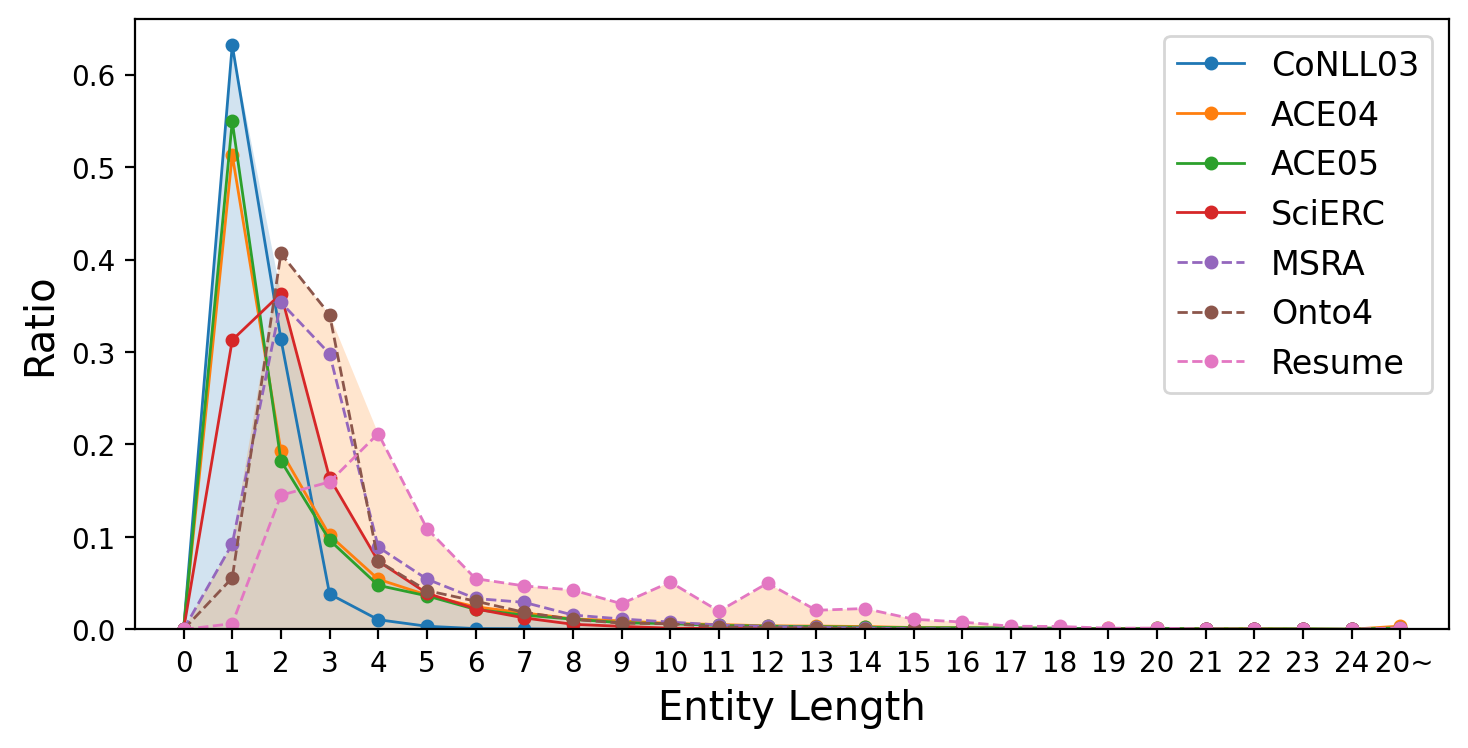

In [28]:
def draw_cumsum_with_cases(
    _total_case, _ratio_case, dataset_names,
    max_length=25, subplots=None, title=None, cumsum=False):
    
    if cumsum:
        total_case = [np.cumsum(_tc).tolist() for _tc in _total_case]
        ratio_case = [np.cumsum(_rc).tolist() for _rc in _ratio_case]
    else:
        total_case = [_tc for _tc in _total_case]
        ratio_case = [_rc for _rc in _ratio_case]
    
    # 绘制图像
    if subplots:
        ax1 = plt.subplot(*subplots)
    else:
        fig, ax1 = plt.subplot()
        fig.set_size_inches(10, 6)
    plt.set_cmap('RdBu')
    dataset_kinds = len(total_case)
    gap_length = (2 * dataset_kinds + 1)
    x = np.arange(max_length + 1) * gap_length

    # ----------
    # 绘制折线图
    # ----------
    ax1.set_xlim(-gap_length, max_length*gap_length+gap_length)
    # ax1.set_ylim(0, np.stack(ratio_case).max() + 0.05)
    ax1.set_ylim(-0.00, 0.66)
    
    instances = []
    for idx, ratio in enumerate(ratio_case):
        # print(ratio)
        linestyle = '-'
        if idx >= 4:
            linestyle = '--'
        res = ax1.plot(x, ratio, linewidth=1, marker='o',  
                       markersize=4, linestyle=linestyle)
        instances.append(res[0])
        
    # print([min(y) for y in zip(ratio_case)], [max(y) for y in zip(ratio_case)])
    ax1.fill_between(x, [min(y) * 0 for y in zip(*ratio_case[:4])], [max(y) for y in zip(*ratio_case[:4])], alpha=0.2)
    ax1.fill_between(x, [min(y) * 0 for y in zip(*ratio_case[4:])], [max(y) for y in zip(*ratio_case[4:])], alpha=0.2)
        
    ax1.yaxis.set_tick_params(labelsize=10) # 设置y轴的字体的大小
    # ax1.axvline(10 * gap_length - dataset_kinds - 1, linestyle='--')
    ax1.set_xlabel("Entity Length", fontsize='x-large')
    ax1.set_ylabel("Ratio", fontsize='x-large')
    # ax1.set_title(title if title else 'The Distribution of Span Counts', fontsize='x-large')

    # 创建xticks
    xticksName = [f"{i}" for i in range(len(x)-1)] + [' 20~']
    ax1.set_xticks(x) # 设置xticks出现的位置
    ax1.set_xticklabels(xticksName)
    
    """
    # ax1.axhline(0.97, linestyle=':')
    # ax1.axhline(1.00, linestyle=':')
    plt.annotate('97%', #文本内容
         xy=(0, 0.97),#注释所在地
         xytext=(0, 0.85), fontsize=12, #文本所在地
         arrowprops=dict(arrowstyle="->"))
    plt.annotate('English Datasets\n    (Solid Lines)', #文本内容
         xy=(18*16, 0.72),#注释所在地
         xytext=(11*16, 0.53), fontsize=12, #文本所在地
         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k', lw=1, alpha=0.5)
         ) # arrowprops=dict(arrowstyle="->")
    
    plt.annotate('Chinese Datasets\n  (Dashed Lines)', #文本内容
         xy=(18*16, 0.3),#注释所在地
         xytext=(20*16, 0.53), fontsize=12, #文本所在地
         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k', lw=1, alpha=0.5)
         )
    """
    # 设置图例
    """
    l1 = plt.legend(instances[:4], [_dn.split('_')[0] for _dn in dataset_names][:4], 
               fontsize = 'x-large', loc='lower center')
    l2 = plt.legend(instances[4:], [_dn.split('_')[0] for _dn in dataset_names][4:], 
               fontsize = 'x-large', loc='lower right')
    plt.gca().add_artist(l1)
    """
    plt.legend(instances[:], [_dn.split(' ')[0] for _dn in dataset_names][:], 
               fontsize = 'larger', loc='upper right')
    if not subplots:
        plt.show()
    

        
legend_en = ['CoNLL03 ($\phi=66.07$)', 
             'ACE04 ($\phi=53.21$)', 
             'ACE05 ($\phi=48.09$)', 
             'SciERC ($\phi=69.99$)']
legend_cn = ['MSRA ($\phi=558.13$)', 
             'Onto4 ($\phi=635.08$)', 
             'Resume ($\phi=156.68$)',
             # 'cluener ($\phi=300.23$)', 
             # 'FinDoc ($\phi=1372.54$)'
            ]
legend_lan = ['English datasets', 'Chinese datasets']

# plt.figure(figsize=(9.2, 3.6), dpi=200)
plt.figure(figsize=(7.2, 3.6), dpi=200)
plt.figure(1)
add_blank_column = False
draw_cumsum_with_cases(
    en_total_case + total_case, en_ratio_case + ratio_case, 
    title='The Distribution of Entity Lengths on NER Datasets',
    dataset_names=legend_en+legend_cn+legend_lan, 
    subplots=(1,1,1), max_length=25)
plt.tight_layout(pad=0.2, w_pad=1.0, h_pad=2.0)
plt.savefig(f'/home/chendian/PURE/figures/distribution_for_entity_length_220822.jpg', bbox_inches='tight')
plt.show()

In [14]:
import numpy as np
np.cumsum([1,2,3,4]).tolist()

[1, 3, 6, 10]

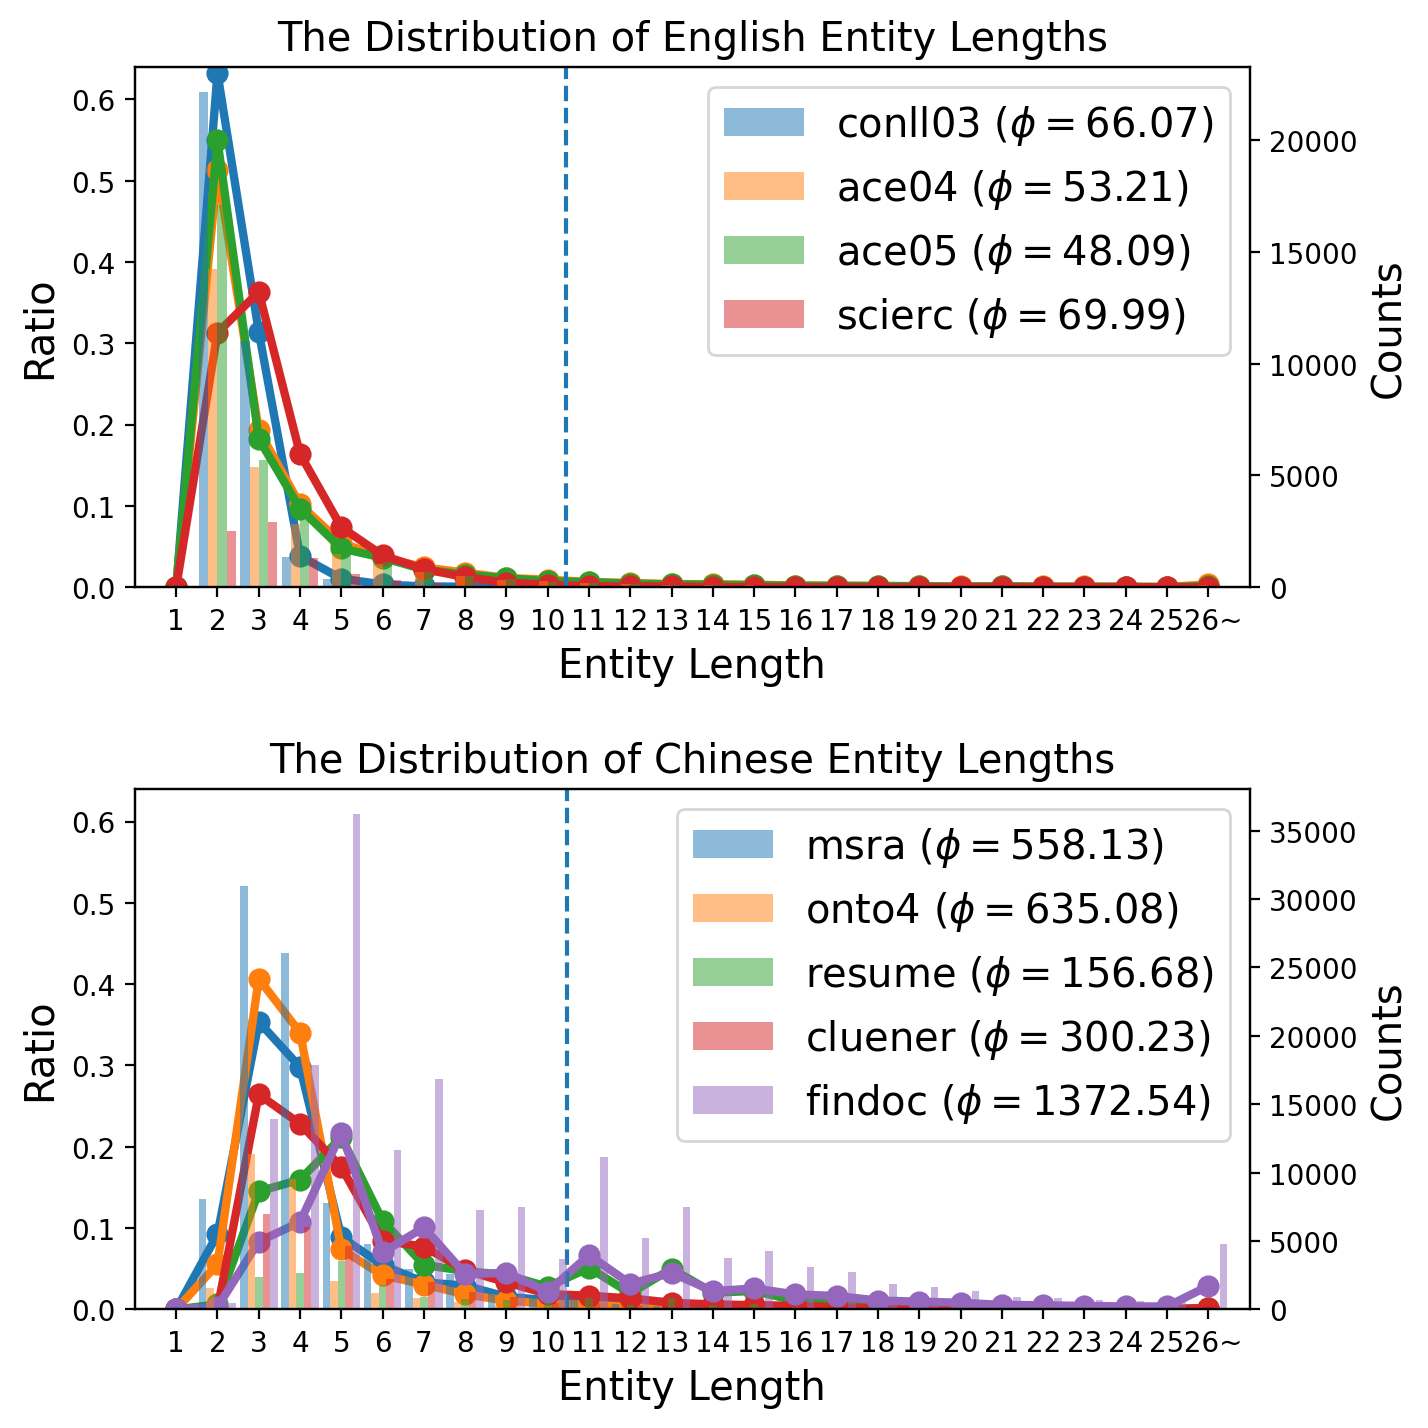

In [127]:
def draw_with_cases(total_case, ratio_case, dataset_names, max_length=25, subplots=None, title=None):    
    
    # 绘制图像
    if subplots:
        ax1 = plt.subplot(*subplots)
    else:
        fig, ax1 = plt.subplot()
        fig.set_size_inches(10, 6)
    plt.set_cmap('RdBu')
    dataset_kinds = len(total_case)
    gap_length = (2 * dataset_kinds + 1)
    x = np.arange(max_length + 1) * gap_length

    # ----------
    # 绘制折线图
    # ----------
    ax1.set_xlim(-gap_length, max_length*gap_length+gap_length)
    # ax1.set_ylim(0, np.stack(ratio_case).max() + 0.05)
    ax1.set_ylim(0.00, 0.64)
    for ratio in ratio_case:
        ax1.plot(x, ratio, linewidth=3, marker='o',  markersize=7, linestyle='-')
    ax1.yaxis.set_tick_params(labelsize=10) # 设置y轴的字体的大小
    ax1.axvline(10 * gap_length - dataset_kinds - 1, linestyle='--')
    ax1.set_xlabel("Entity Length", fontsize='x-large')
    ax1.set_ylabel("Ratio", fontsize='x-large')

    # ----------
    # 绘制柱状图
    # ----------
    ax2 = ax1.twinx() # 次坐标
    ax2.set_xlim(-gap_length, max_length*gap_length+gap_length)
    w = 1
    
    _x_position = list(range(-(dataset_kinds-1)*w, (dataset_kinds-1)*w+1, 2*w))
    # print(_x_position)
    for idx, _x in enumerate(_x_position):
        ax2.bar(x+_x, total_case[idx], width=2*w, align='center', alpha=0.5)
    # ax2.semilogy(True)

    # 设置坐标轴的标签
    ax2.yaxis.set_tick_params(labelsize=10) # 设置y轴的字体的大小
    ax2.set_xticks(x) # 设置xticks出现的位置
    plt.xticks(rotation=45)

    # 创建xticks
    xticksName = [f"{i}" for i in range(1, len(x))] + [' 26~']
    ax1.set_xticklabels(xticksName)

    # 设置坐标轴名称
    ax2.set_ylabel("Counts", fontsize='x-large')
    # 设置标题
    ax2.set_title(title if title else 'The Distribution of Span Counts', fontsize='x-large')
    # 设置图例
    plt.legend([_dn.split('_')[0] for _dn in dataset_names], 
               fontsize = 'x-large', loc='upper right')
    if not subplots:
        plt.show()

        
legend_cn = ['msra ($\phi=558.13$)', 'onto4 ($\phi=635.08$)', 'resume ($\phi=156.68$)', 'cluener ($\phi=300.23$)', 'findoc ($\phi=1372.54$)']
legend_en = ['conll03 ($\phi=66.07$)', 'ace04 ($\phi=53.21$)', 'ace05 ($\phi=48.09$)', 'scierc ($\phi=69.99$)']

plt.figure(figsize=(7, 7), dpi=200)
plt.figure(1)
add_blank_column = False
draw_with_cases(en_total_case, en_ratio_case, 
                title='The Distribution of English Entity Lengths',
                dataset_names=legend_en, max_length=25, subplots=(2,1,1))
draw_with_cases(total_case, ratio_case, 
                title='The Distribution of Chinese Entity Lengths',
                dataset_names=legend_cn, max_length=25, subplots=(2,1,2))
plt.tight_layout(pad=0.2, w_pad=3.0, h_pad=2.0)
plt.savefig(f'/home/chendian/PURE/figures/distribution_for_entity_length_211115.jpg', bbox_inches='tight')
plt.show()

## Draw single curve

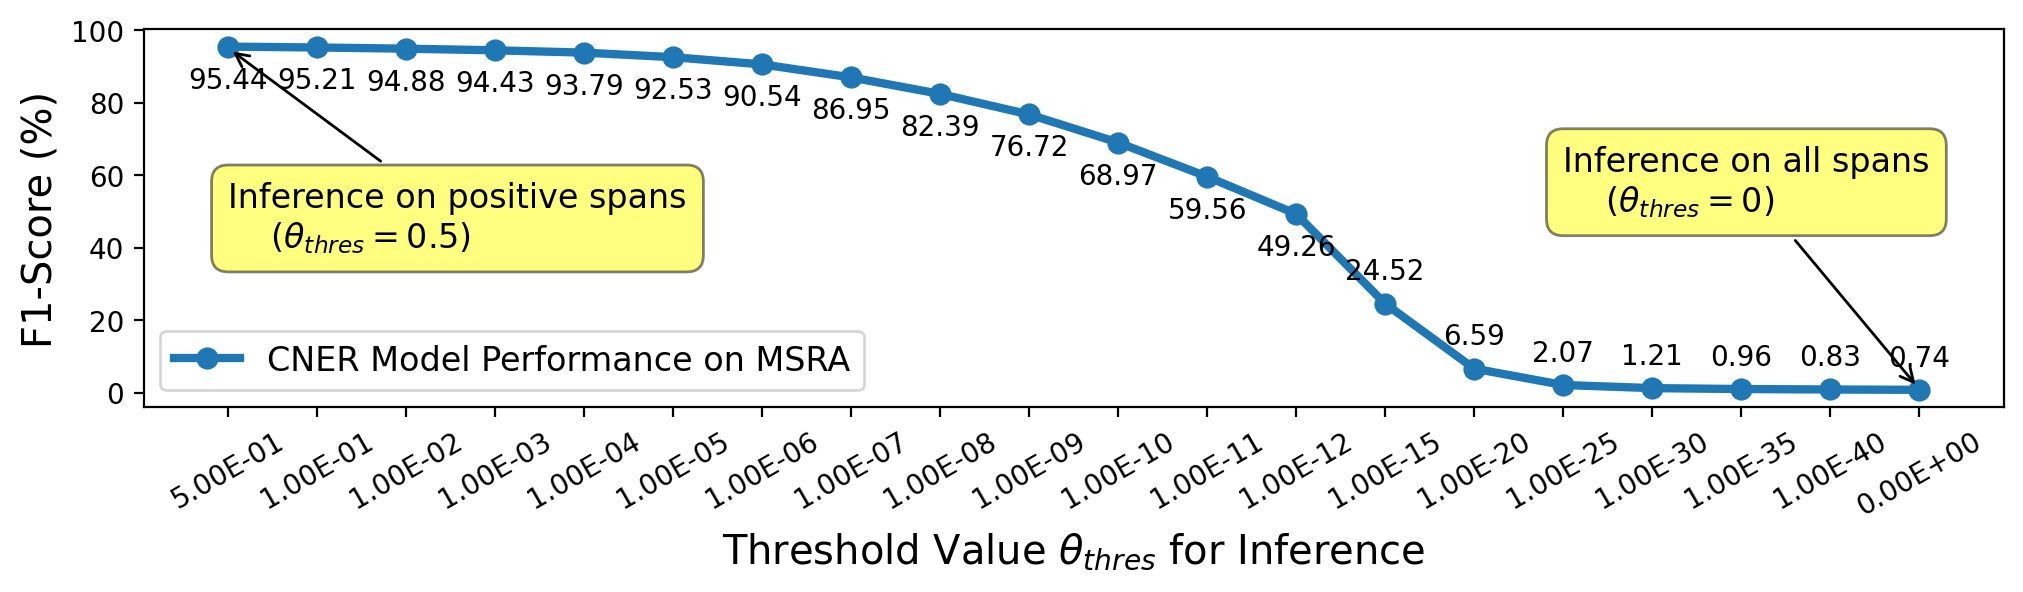

In [346]:
xticksName = "5.00E-01	1.00E-01	1.00E-02	1.00E-03	1.00E-04	1.00E-05	1.00E-06	1.00E-07	1.00E-08	1.00E-09	1.00E-10	1.00E-11	1.00E-12	1.00E-15	1.00E-20	1.00E-25	1.00E-30	1.00E-35	1.00E-40	0.00E+00".split('\t')
f1_score = list(map(float, "95.44	95.21	94.88	94.43	93.79	92.53	90.54	86.95	82.39	76.72	68.97	59.56	49.26	24.52	6.59	2.07	1.21	0.96	0.83	0.74".split('\t')))

plt.figure(figsize=(12, 2.5), dpi=200)
ax = plt.subplot()
ax.plot(range(1, len(f1_score)+1), f1_score, linewidth=3, marker='o',  markersize=7, linestyle='-')
for _i, (__x, __y) in enumerate(zip(range(1, len(f1_score)+1), f1_score)):
    plt.text(
        __x, 
        __y - 13 if __y > 30 else __y + 5, 
        round(__y, 2), 
        ha="center", 
        va="bottom",
        # fontsize='medium'
    )

plt.annotate('Inference on positive spans from scoring\n' + r'    ($ \theta_{thres} = 0.5 $)', #文本内容
     xy=(1, 95),#注释所在地
     xytext=(1, 40), fontsize=12, #文本所在地
     arrowprops=dict(arrowstyle="->"),
     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k', lw=1, alpha=0.5)
)
    
plt.annotate('Inference on all spans\n' + r'    ($ \theta_{thres} = 0 $)', #文本内容
     xy=(20, 1),#注释所在地
     xytext=(16, 50), fontsize=12, #文本所在地
     arrowprops=dict(arrowstyle="->"),
     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k', lw=1, alpha=0.5)
)

plt.xticks(range(1, len(f1_score)+1), rotation=30)
ax.set_xticklabels(xticksName)
ax.set_xlabel(r"Threshold Value $\theta_{thres}$ for Inference", fontsize='x-large')
ax.set_ylabel("F1-Score (%)", fontsize='x-large')
# ax.set_title("Pipeline Model Performance with different threshold in inference", fontsize='xx-large')
plt.legend(["CNER Model Performance on MSRA"], 
               fontsize = 'large', loc='lower left')
plt.savefig(f'/home/chendian/PURE/figures/pipeline_with_thres_220609.jpg', bbox_inches='tight')
plt.show()


## Draw Ratio Hyper-Param Selecting

In [59]:
def draw_ratio_with_cases(x_case, y_case, dataset_names, x_label=None, subplots=None, title=None, ylim_min=0.9, ylim_max=0.99):
    # 绘制图像
    if subplots:
        ax1 = plt.subplot(*subplots)
    else:
        fig, ax1 = plt.subplot()
        fig.set_size_inches(10, 6)
    plt.set_cmap('RdBu')

    # ----------
    # 绘制折线图
    # ----------
    ax1.set_ylim(ylim_min, ylim_max)
    curves = []
    for ratio in y_case:
        _cv, =ax1.plot(x_case, ratio, linewidth=3, marker='o',  markersize=7, linestyle='-')
        curves.append(_cv)
    ax1.yaxis.set_tick_params(labelsize=10) # 设置y轴的字体的大小
    # ax1.set_xlabel(r"Hyper-parameter $ \theta_{FRNP} $ for Filtering", fontsize='x-large')
    ax1.set_xlabel(r"$ \theta_{FRNP} $ for Filtering", fontsize='xx-large')
    if 'msra' in title.lower():
        ax1.set_ylabel("F1-Score", fontsize='xx-large')
    
    # 创建xticks
    if x_label:
        xticksName = x_label
    else:
        xticksName = [f"{i}" for i in range(1, len(x))] + [' 26~']
    ax1.set_xticklabels(xticksName)
    ax1.set_xticks(x_case)

    # ------
    # 设置 baseline 线
    # ------   
    
    if 'msra' in title.lower():
        bc_value = 0.9470
    elif 'resume' in title.lower():
        bc_value = 0.9603
    elif 'onto4' in title.lower():
        bc_value = 0.8149
    
    bc_value *= 100
    ax1.axhline(bc_value, linestyle=':')
    ax1.annotate('MacBERT-CRF baseline', #文本内容
        xy=(1, bc_value),  #注释所在地   
        xytext=(0, bc_value + 0.02), fontsize=14, #文本所在地
        # arrowprops=dict(arrowstyle="->"),
        # bbox=dict(boxstyle='round, pad=0.3', fc='white', ec='k', lw=0, alpha=0.7)
    )
    
    """
    if 'msra' in title.lower():
        bc_value = 0.9545
    elif 'resume' in title.lower():
        bc_value = 0.9578
    elif 'onto4' in title.lower():
        bc_value = 0.8089
    
    bc_value *= 100
    ax1.axhline(bc_value, linestyle='--')
    ax1.annotate('TakeAll baseline', #文本内容
        xy=(1, bc_value),  #注释所在地   
        xytext=(1, bc_value), fontsize=11, #文本所在地
        # arrowprops=dict(arrowstyle="->"),
        # bbox=dict(boxstyle='round, pad=0.3', fc='white', ec='k', lw=0, alpha=0.7)
    )
    """
    
    """
    if 'msra' in title.lower():
        bc_value = 0.9609
    elif 'resume' in title.lower():
        bc_value = 0.9679
    elif 'onto4' in title.lower():
        bc_value = 0.8204
    
    bc_value *= 100
    ax1.axhline(bc_value, linestyle='--')
    ax1.annotate('SOTA line', #文本内容
        xy=(1, bc_value),  #注释所在地   
        xytext=(0, bc_value + 0.02), fontsize=13, #文本所在地
        # arrowprops=dict(arrowstyle="->"),
        # bbox=dict(boxstyle='round, pad=0.3', fc='white', ec='k', lw=0, alpha=0.7)
    )
    """
    
    if 'msra' in title.lower():
        x_value = 6.6  # 219
    elif 'resume' in title.lower():
        x_value = 5.6  # 71
    elif 'onto4' in title.lower():
        x_value = 7.7  # 236
    
    
    annote_text = r'$\phi_{avg}$ value' + '\n on dataset' #文本内容
    ax1.axvline(x_value, linestyle=':', c="r")
    if 'msra' in title.lower():
        ax1.annotate(annote_text,
            xy=(x_value, ylim_min + 1.0),  #注释所在地   
            xytext=(x_value - 3.3, ylim_min + 1.2), fontsize=15, #文本所在地
            arrowprops=dict(arrowstyle="->"),
        )
    if 'resume' in title.lower():
        ax1.annotate(annote_text,
            xy=(x_value, ylim_min + 0.7),  #注释所在地   
            xytext=(x_value - 3.6, ylim_min + 0.3), fontsize=15, #文本所在地
            arrowprops=dict(arrowstyle="->"),
        )
    if 'onto4' in title.lower():
        ax1.annotate(annote_text,
            xy=(x_value, ylim_min + 1.75),  #注释所在地   
            xytext=(x_value - 4, ylim_min + 1.9), fontsize=15, #文本所在地
            arrowprops=dict(arrowstyle="->"),
            # bbox=dict(boxstyle='round, pad=0.3', fc='white', ec='k', lw=0, alpha=0.7)
        )
    
    # 设置图例
    """
    plt.legend(handles=curves, labels=dataset_names,
               fontsize = 'xx-large', 
               # bbox_to_anchor=(0.0, 0.1), # 第一个数值用于控制legend的左右移动，值越大越向右边移动，第二个数值用于控制legend的上下移动，值越大，越向上移动。
               loc='lower right')
    """
    title_str = dataset_names[0]
    if title_str in ['msra']:
        title_str = title_str.upper()
    else:
        title_str = title_str.capitalize()
    plt.title(f"On {title_str} dataset", fontsize = 'xx-large')
    
    if not subplots:
        plt.show()

In [34]:
a = 'abc'
a.capitalize()

'Abc'

/home/chendian/.conda/envs/pure/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


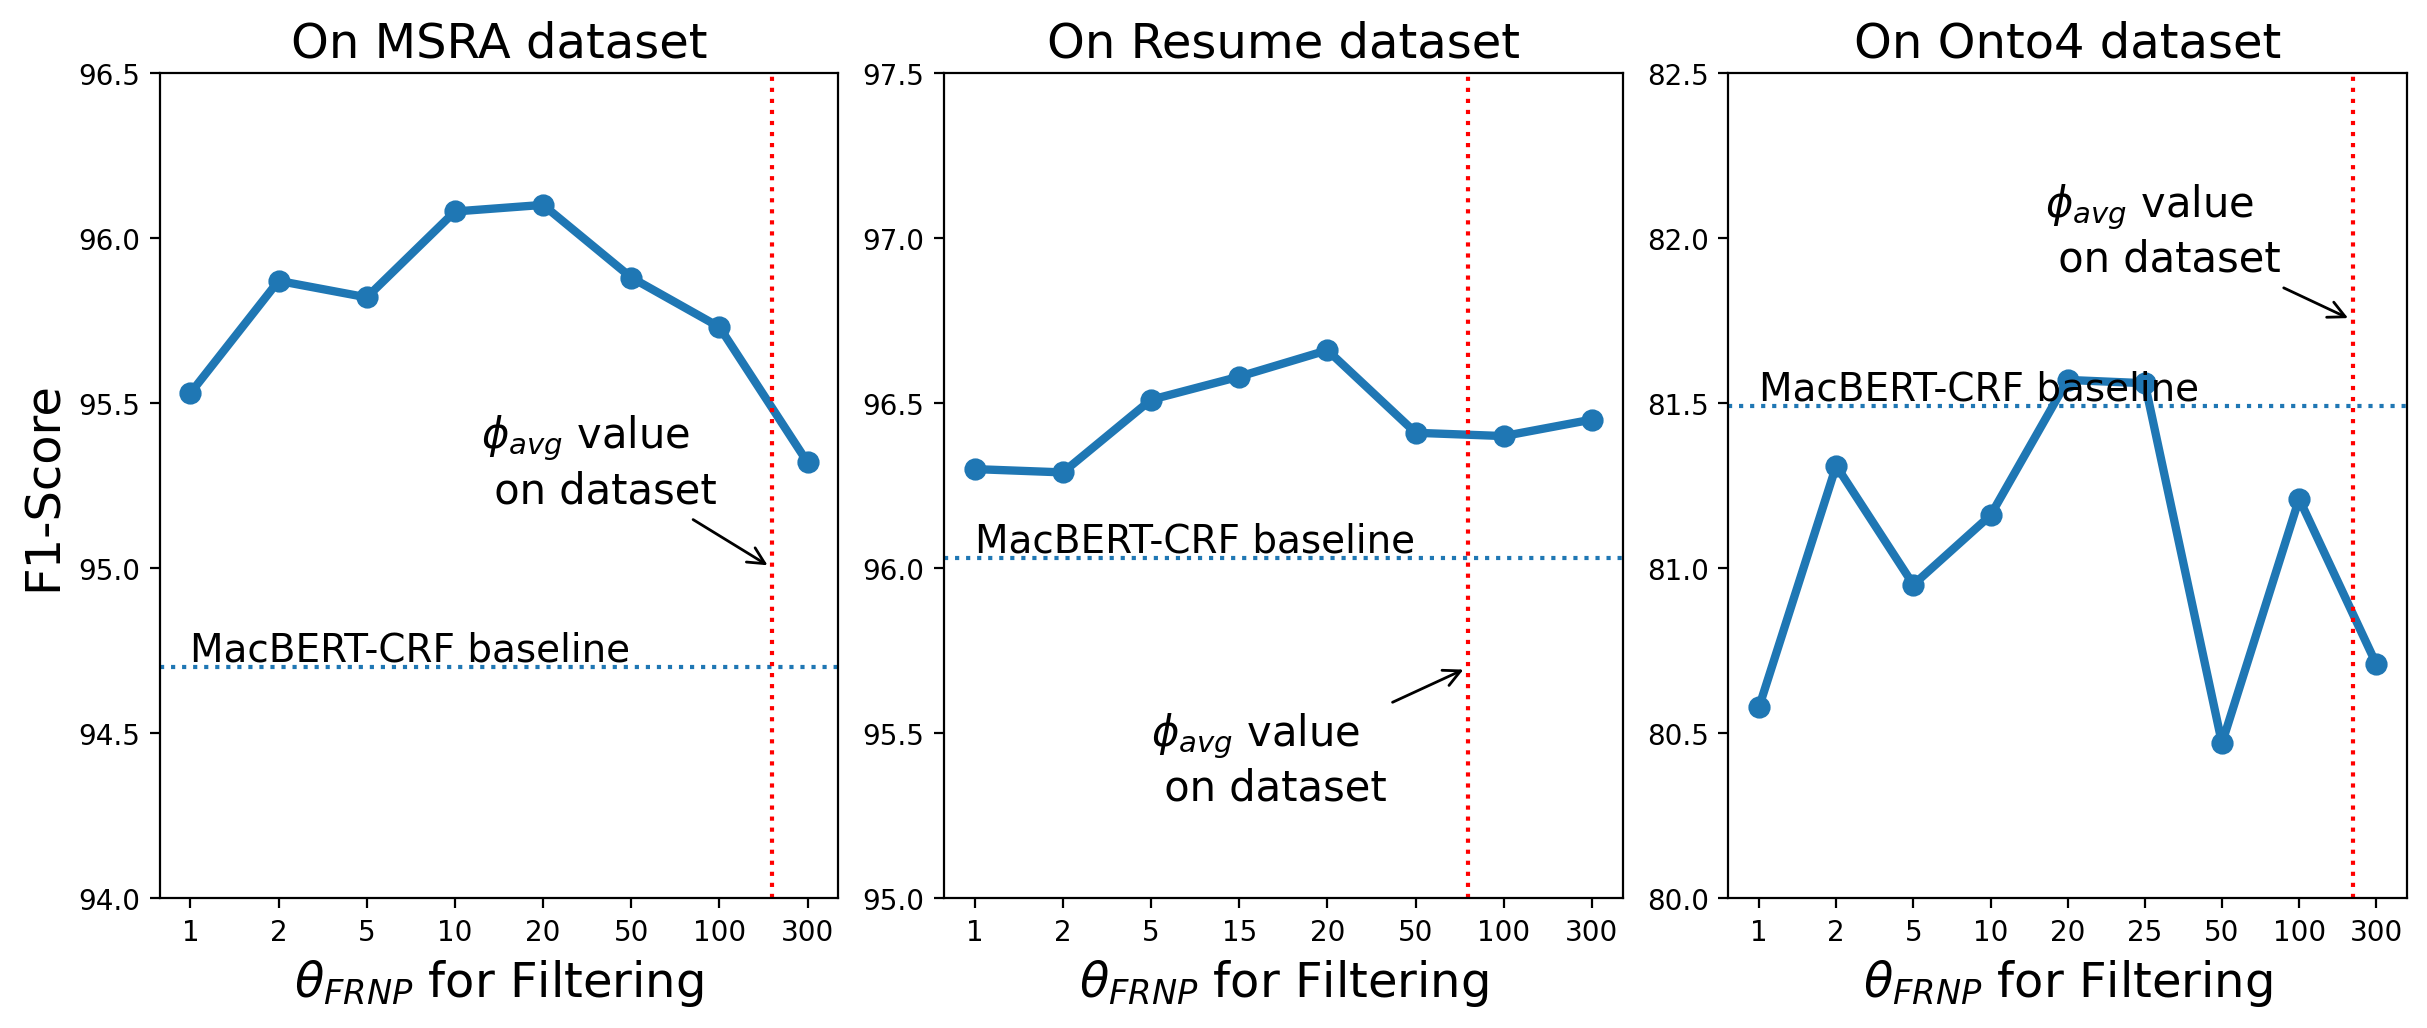

In [61]:
plt.figure(figsize=(12, 5), dpi=200)
plt.figure(1)
add_blank_column = False

# MSRA
msra_f1 = {
    1: 95.53, 2: 95.87, 5: 95.82, 
    10: 96.08, 20: 96.10, 
    # 30: 95.75, 
    50: 95.88,
    100: 95.73, 300: 95.32, 
}
values = [list(msra_f1.values())]
draw_ratio_with_cases(
    list(range(len(values[0]))), 
    values, 
    dataset_names=['msra'],
    x_label=list(map(str, msra_f1.keys())),
    title='on MSRA dataset',
    ylim_min=94.0, 
    # ylim_max=96.25,
    ylim_max=96.5,
    subplots=(1,3,1)
)

resume_f1 = {
    1: 96.30, 2: 96.29, 5: 96.51, 
    15: 96.58, 20: 96.66, 
    # 25: 96.37, 
    # 30: 96.30,
    50: 96.41,
    100: 96.40, 300: 96.45, 
}
values = [list(resume_f1.values())]
draw_ratio_with_cases(
    list(range(len(values[0]))), 
    values, 
    dataset_names=['resume'],
    x_label=list(map(str, resume_f1.keys())),
    title='on Resume dataset',
    ylim_min=95.0, 
    ylim_max=97.5,
    subplots=(1,3,2)
)

onto4_f1 = {
    1: 80.58, 2: 81.31, 5: 80.95, 
    10: 81.16, 20: 81.57, 25: 81.56,
    50: 80.47, 100: 81.21, 300: 80.71, 
}
values = [list(onto4_f1.values())]
draw_ratio_with_cases(
    list(range(len(values[0]))), 
    values, 
    dataset_names=['onto4'],
    x_label=list(map(str, onto4_f1.keys())),
    title='on Onto4 dataset',
    ylim_min=80., ylim_max=82.5,
    subplots=(1,3,3)
)

plt.tight_layout(pad=0.2, w_pad=0.8, h_pad=2.)
plt.savefig(f'/home/chendian/PURE/figures/further_analysis_ratio_220822.jpg', bbox_inches='tight')
plt.show()


In [29]:
1

1

## Draw Span Score Feature

In [ ]:
import json
import numpy as np

def load_span_counts(dir_name, cum_sum=False, max_length=25):
    per = np.zeros(max_length+1, dtype=np.int) 
    org = np.zeros(max_length+1, dtype=np.int)
    loc = np.zeros(max_length+1, dtype=np.int)
    others = np.zeros(max_length+1, dtype=np.int)

    case = {'人名': per, '公司': org, '地址': loc, '其它': others}
    file_name = f"/home/chendian/PURE/data/{dir_name}/total.span_counts.json"
    for phase, record in json.load(open(file_name, 'r')).items():
        for span_length, tag_rec in sorted(record.items()):
            for tag, count in tag_rec.items():
                case[tag][min(int(span_length), max_length)] += count

    total = per + org + loc + others
    if cum_sum:
        ratio = np.cumsum(total) / total.sum()
    else:
        ratio = total / total.sum()
    return total, ratio

max_length = 25
total_case, ratio_case = [], []
target_dir_names = ['msra_origin', 'onto4', 'resume', 'cluener', 'findoc']
for dir_name in target_dir_names:
    total, ratio = load_span_counts(dir_name, max_length=25)
    total_case.append(total)
    ratio_case.append(ratio)

## Draw Span Score Distribution Curve

In [ ]:
# MSRA

inp = """
0.00E+00	1,740,258 	6,190 	1	95.89/95.51/95.55
1.00E-40	1,550,770 	6,190 	1	95.86/95.35/95.60
1.00E-35	1,357,746 	6,190 	1	95.48/95.91/95.70
1.00E-30	1,085,176 	6,190 	1	95.70/95.38/95.54
1.00E-29	1,012,800 	6,190 	1	95.84/95.38/95.61
1.00E-28	932,131 	6,190 	1	95.90/95.26/95.58
1.00E-27	841,470 	6,189 	0.999838449	96.16/95.82/95.99
1.00E-26	741,868 	6,188 	0.999676898	95.81/95.59/95.70
1.00E-25	635,444 	6,188 	0.999676898	96.12/95.12/95.62
1.00E-24	529,273 	6,188 	0.999676898	95.94/95.32/95.62
1.00E-23	427,296 	6,187 	0.999515347	96.04/95.27/95.65
1.00E-22	335,243 	6,185 	0.999192246	96.10/95.82/95.96
1.00E-21	257,142 	6,183 	0.998869144	96.14/95.38/95.76
1.00E-20	193,566 	6,182 	0.998707593	95.93/95.99/95.96
1.00E-19	144,888 	6,178 	0.998061389	95.50/95.62/95.56
1.00E-18	142,309 	6,177 	0.997899838	95.81/95.32/95.56
1.00E-17	81,243 	6,172 	0.997092084	95.26/95.48/95.37
1.00E-16	61,073 	6,165 	0.995961228	95.85/95.19/95.52
1.00E-15	46,177 	6,155 	0.994345719	95.31/95.13/95.22
1.00E-14	35,133 	6,148 	0.993214863	94.67/95.22/94.94
1.00E-13	26,473 	6,144 	0.992568659	93.61/96.38/94.98
1.00E-12	20,037 	6,135 	0.991114701	92.46/96.04/94.22
1.00E-11	15,642 	6,120 	0.988691438	92.15/96.20/94.14
1.00E-10	12,813 	6,108 	0.986752827	90.71/96.72/93.62
1.00E-09	11,006 	6,094 	0.984491115	89.91/96.20/92.95
1.00E-08	9,899 	6,078 	0.9819063	87.97/97.09/92.31
1.00E-07	9,110 	6,056 	0.978352181	87.26/97.08/91.91
1.00E-06	8,530 	6,043 	0.976252019	89.54/95.53/92.43
1.00E-05	8,199 	6,022 	0.972859451	89.02/96.80/92.75
1.00E-04	7,999 	6,004 	0.969951535	91.24/96.62/93.86
1.00E-03	7,874 	5,977 	0.965589661	92.70/96.22/94.43
1.00E-02	7,770 	5,954 	0.96187399	93.82/95.83/94.81
1.00E-01	7,686 	5,928 	0.957673667	94.81/95.38/95.10
5.00E-01	7,571 	5,899 	0.952988691	95.90/94.81/95.35
"""


f1_score_all = """
95.55	
95.60	
95.70	
95.54	
95.61	
95.58	
95.99	
95.70	
95.62	
95.62	
95.65	
95.96	
95.76	
95.96	
95.55	
95.55	
95.36	
95.49	
95.18	
94.78	
93.91	
91.24	
87.50	
75.30	
60.73	
31.18	
19.25	
15.17	
8.82	
7.10	
5.20	
3.65	
3.57	
3.71	
""".split('\n')


# f1_score_half = [float(item.strip()) / 100 for item in f1_score_half if item][::-1]
f1_score_all = [float(item.strip()) / 100 for item in f1_score_all if item.strip()][::-1]

In [135]:
# Resume 

inp = """
0.00E+00	158,743 	1,623 	0.995705521	95.54/96.01/95.78
1.00E-30	123,827 	1,623 	0.995705521	95.50/96.26/95.88
1.00E-20	69,809 	1,622 	0.995092025	95.39/96.50/95.94
1.00E-15	35,759 	1,620 	0.993865031	96.23/95.52/95.87
1.00E-10	14,537 	1,615 	0.990797546	95.31/96.07/95.69
1.00E-05	2,037 	1,595 	0.978527607	90.87/97.06/93.86
1.00E-02	1,711 	1,582 	0.970552147	92.99/96.81/94.86
1.00E-01	1,675 	1,574 	0.965644172	94.82/96.50/95.65
5.00E-01	1,654 	1,567 	0.961349693	95.42/95.95/95.69
"""

f1_score_all = """
95.78	
95.88	
95.94	
95.87	
95.72	
28.95	
2.15	
2.21	
2.04
""".split('\n')

f1_score_all = [float(item.strip()) / 100 for item in f1_score_all if item][::-1]

In [137]:
# Onto4
inp = """
0.00E+00	1,858,719 	7,684 	1	83.46/78.46/80.89
1.00E-40	1,535,197	7,684	1	85.27/77.15/81.01
1.00E-35	1,296,337 	7,684 	1	82.08/80.97/81.53
1.00E-30	935,226 	7,684 	1	84.19/79.50/81.78
1.00E-25	441,487 	7,669 	0.998047892	82.59/80.51/81.53
1.00E-20	163,216 	7,589 	0.987636648	81.04/80.90/80.97
1.00E-15	70,471 	7,491 	0.974882874	81.92/81.05/81.48
1.00E-10	22,181 	7,239 	0.942087454	78.14/81.92/79.99
1.00E-05	10,793 	6,940 	0.903175429	73.72/84.34/78.68
1.00E-01	9,224 	6,485 	0.843961478	80.09/82.29/81.17
5.00E-01	8,813 	6,404 	0.833420094	81.71/80.48/81.09
"""

f1_score_all = """
80.89
81.01
81.53
81.78	
81.53	
80.97	
80.97	
70.31	
7.47	
4.06	
3.99
""".split('\n')
f1_score_all = [float(item.strip()) / 100 for item in f1_score_all if item][::-1]

In [138]:
thres = []
n_pred = []
n_recall = []
f1_score = []

for l_idx, line in enumerate(inp.split('\n')[::-1]):
    if not line.strip():
        continue
    if line.startswith('1.00E-'):
        if int(line.split('\t')[0].split('E-')[1]) > 40:
            continue
        # if int(line.split('\t')[0].split('E-')[1]) in range(21, 25):
        #     continue
    for idx, item in enumerate(line.strip().split('\t')):
        item = item.strip().replace(',', '')
        if idx == 0:
            thres.append(item)
        elif idx == 1:
            n_pred.append(int(item))
        elif idx == 2:
            n_recall.append(int(item))
        elif idx == 3:
            pass
        elif idx == 4:
            f1_score.append(float(item.split('/')[-1]))

thres = [item.replace('.00', '').replace('E+00', '') for item in thres]
n_pred = [item / n_pred[-1] for item in n_pred]
n_recall = [item / n_recall[-1] for item in n_recall]
f1_score = [item / 100 for item in f1_score]
# f1_score_all = [item for _i, item in enumerate(f1_score_all) if _i not in range(21,25)]
for each in zip(thres, n_pred, n_recall, f1_score, f1_score_all):
    print(each)
print(list(map(len, [thres, n_pred, n_recall, f1_score, f1_score_all])))

# msra_case = (thres, n_pred, n_recall, f1_score, f1_score_all)
# resume_case = (thres, n_pred, n_recall, f1_score, f1_score_all)
onto4_case = (thres, n_pred, n_recall, f1_score, f1_score_all)

('5E-01', 0.0047414375169135305, 0.8334200937011973, 0.8109000000000001, 0.039900000000000005)
('1E-01', 0.00496255754635316, 0.8439614783966684, 0.8117, 0.0406)
('1E-05', 0.005806687293775982, 0.9031754294638209, 0.7868, 0.0747)
('1E-10', 0.011933487525548509, 0.9420874544508069, 0.7998999999999999, 0.7031000000000001)
('1E-15', 0.03791374597236053, 0.9748828735033837, 0.8148000000000001, 0.8097)
('1E-20', 0.08781101392948584, 0.9876366475793857, 0.8097, 0.8097)
('1E-25', 0.2375221859786229, 0.9980478917230609, 0.8153, 0.8153)
('1E-30', 0.5031562059676584, 1.0, 0.8178, 0.8178)
('1E-35', 0.6974357070649194, 1.0, 0.8153, 0.8153)
('1E-40', 0.8259435665100534, 1.0, 0.8101, 0.8101)
('0', 1.0, 1.0, 0.8089, 0.8089)
[11, 11, 11, 11, 11]


In [3]:
from pprint import pprint
pprint(list(zip(f1_score, f1_score_all)))

[(0.9534999999999999, 0.0371),
 (0.951, 0.035699999999999996),
 (0.9481, 0.0365),
 (0.9443, 0.052000000000000005),
 (0.9386, 0.071),
 (0.9275, 0.0882),
 (0.9243000000000001, 0.1517),
 (0.9190999999999999, 0.1925),
 (0.9231, 0.3118),
 (0.9295, 0.6073),
 (0.9362, 0.753),
 (0.9414, 0.875),
 (0.9422, 0.9124),
 (0.9498000000000001, 0.9390999999999999),
 (0.9494, 0.9478),
 (0.9521999999999999, 0.9518000000000001),
 (0.9551999999999999, 0.9549),
 (0.9537, 0.9536),
 (0.9556, 0.9555),
 (0.9556, 0.9555),
 (0.9595999999999999, 0.9595999999999999),
 (0.9576, 0.9576),
 (0.9595999999999999, 0.9595999999999999),
 (0.9565, 0.9565),
 (0.9562, 0.9562),
 (0.9562, 0.9562),
 (0.9570000000000001, 0.9570000000000001),
 (0.9599, 0.9599),
 (0.9558, 0.9558),
 (0.9561, 0.9561),
 (0.9554, 0.9554),
 (0.9570000000000001, 0.9570000000000001),
 (0.956, 0.956),
 (0.9555, 0.9555)]


In [363]:
def draw_with_cases(total_case, ratio_case, dataset_names, x_label=None, max_length=25, subplots=None, title=None, ylim_min=0.9, ylim_max=0.99):
    # 绘制图像
    if subplots:
        ax1 = plt.subplot(*subplots)
    else:
        fig, ax1 = plt.subplot()
        fig.set_size_inches(10, 6)
    plt.set_cmap('RdBu')
    dataset_kinds = len(total_case)
    gap_length = (2 * dataset_kinds + 1)
    x = np.arange(max_length + 1) * gap_length

    # ----------
    # 绘制折线图
    # ----------
    ax1.set_xlim(-gap_length, max_length*gap_length+gap_length)
    # ax1.set_ylim(0, np.stack(ratio_case).max() + 0.05)
    ax1.set_ylim(ylim_min, ylim_max)
    curves = []
    for ratio in ratio_case:
        _cv, = ax1.plot(x, ratio, linewidth=3, marker='^', c='r', markersize=7, linestyle='--')
        curves.append(_cv)
    ax1.yaxis.set_tick_params(labelsize=10) # 设置y轴的字体的大小
    # ax1.axvline(16 * gap_length - dataset_kinds - 1, linestyle='--')
    ax1.set_xlabel("Threshold Value θ", fontsize='x-large')
    ax1.set_ylabel("F1-Score", fontsize='x-large')

    # ----------
    # 绘制柱状图
    # ----------
    ax2 = ax1.twinx() # 次坐标
    ax2.set_xlim(-gap_length, max_length*gap_length+gap_length)
    w = 1
    
    bars = []
    for ratio in total_case:
        _cv, = ax2.plot(x, ratio, linewidth=3, marker='o', markersize=7, linestyle='-')
        bars.append(_cv)
    
    """
    _x_position = list(range(-(dataset_kinds-1)*w, (dataset_kinds-1)*w+1, 2*w))
    for idx, _x in enumerate(_x_position):
        for _i, (__x, __y) in enumerate(zip(x+_x, total_case[idx])):
            plt.text(
                __x, 
                __y if idx else __y, 
                round(__y, 2) if idx else round(__y, 3), 
                ha="center", 
                va="bottom",
                fontsize='small'
            )
    """
    """
    _x_position = list(range(-(dataset_kinds-1)*w, (dataset_kinds-1)*w+1, 2*w))
    # print(_x_position)

    for idx, _x in enumerate(_x_position):
        _br = ax2.bar(x+_x, total_case[idx], width=2*w, align='center', alpha=0.5)
        bars.append(_br)
        # ax2.semilogy(True)
        for _i, (__x, __y) in enumerate(zip(x+_x, total_case[idx])):
            plt.text(
                __x, 
                __y if idx else __y, 
                round(__y, 2) if idx else round(__y, 3), 
                ha="center", 
                va="bottom",
                fontsize='small'
            )
    """
    
    # 设置坐标轴的标签
    ax2.yaxis.set_tick_params(labelsize=10) # 设置y轴的字体的大小
    ax2.set_xticks(x) # 设置xticks出现的位置
    
    # 创建xticks
    if x_label:
        xticksName = x_label
    else:
        xticksName = [f"{i}" for i in range(1, len(x))] + [' 26~']
    ax1.set_xticklabels(xticksName)

    # ------
    # 设置 baseline 线
    # ------
    
    ax1.set_ylim(ylim_min, ylim_max)
    
    ax1.axhline(ratio_case[0][-1], linestyle='--')
    ax1.annotate('TakeAll baseline', #文本内容
        xy=(1, ratio_case[0][-1]),#注释所在地
        xytext=(1, ratio_case[0][-1]), fontsize=11, #文本所在地
        # arrowprops=dict(arrowstyle="->"),
        # bbox=dict(boxstyle='round, pad=0.5', fc='yellow', ec='k', lw=1, alpha=0.5)
        # bbox=dict(boxstyle='round, pad=0.3', fc='white', ec='k', lw=0, alpha=0.7),
    )
    
    if 'msra' in title.lower():
        bc_value = 0.9428 # 0.9470
    elif 'resume' in title.lower():
        bc_value = 0.9592 # 0.9603
    elif 'onto4' in title.lower():
        bc_value = 0.8066 # 0.8149
    
    ax1.axhline(bc_value, linestyle=':')
    ax1.annotate('BERT-CRF baseline', #文本内容
        xy=(1, bc_value),  #注释所在地   
        xytext=(1, bc_value), fontsize=11, #文本所在地
        # arrowprops=dict(arrowstyle="->"),
        # bbox=dict(boxstyle='round, pad=0.3', fc='white', ec='k', lw=0, alpha=0.7)
    )
    
    # 设置坐标轴名称
    ax2.set_ylabel("Cover Rate", fontsize='x-large')
    # 设置标题
    ax2.set_title(title if title else 'The Distribution of Span Counts', 
                  # fontsize='xx-large'
                  size=24
                 )
    # 设置图例
    plt.legend(handles=curves+bars, labels=dataset_names,  # [_dn.split('_')[0] for _dn in dataset_names], 
               fontsize = 'x-large' if 'msra' in title.lower() else 'large', 
               bbox_to_anchor=(0.0, 0.1), # 第一个数值用于控制legend的左右移动，值越大越向右边移动，第二个数值用于控制legend的上下移动，值越大，越向上移动。
               loc='lower left')
    
    for xtick in ax1.get_xticklabels():
        xtick.set_rotation(20)
    
    if not subplots:
        plt.show()


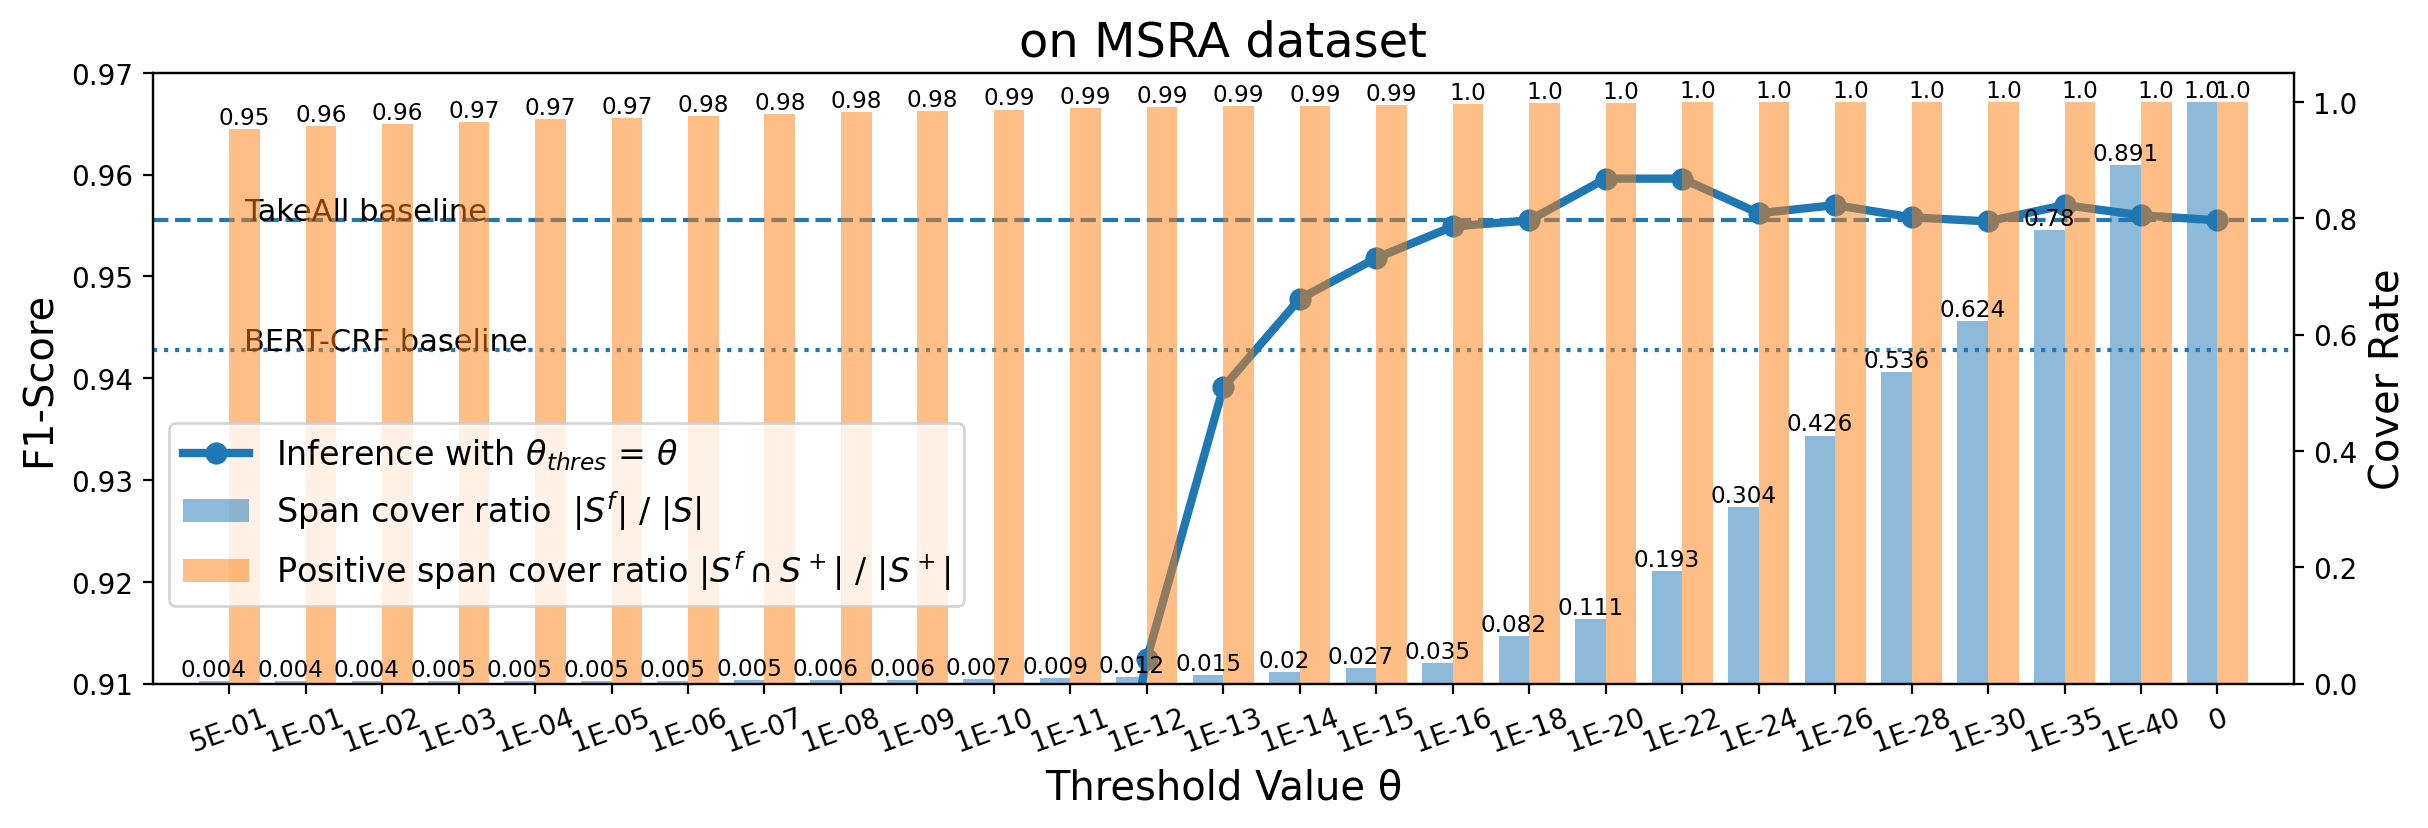

In [201]:
# MSRA
plt.figure(figsize=(12, 4), dpi=200)
plt.figure(1)
add_blank_column = False
names = [r'Inference with $\theta_{thres}$ = $\theta$', 
         # r'Inference with $\theta_{thres}$ = 0', 
         r'Training with Span cover ratio  $|S^f| ~/~ |S|$', 
         r'Training with Positive span cover ratio $|S^f\cap S^+| ~/~ |S^+|$']


selected_indexes = list(range(len(msra_case[0])))
selected_indexes.remove(17)
selected_indexes.remove(19)
selected_indexes.remove(21)
selected_indexes.remove(23)
selected_indexes.remove(25)
selected_indexes.remove(27)
selected_indexes.remove(29)

if selected_indexes:
    thres = [item for idx, item in enumerate(msra_case[0]) if idx in selected_indexes]
    n_pred = [item for idx, item in enumerate(msra_case[1]) if idx in selected_indexes]
    n_recall = [item for idx, item in enumerate(msra_case[2]) if idx in selected_indexes]
    f1_score = [item for idx, item in enumerate(msra_case[3]) if idx in selected_indexes]
    f1_score_all = [item for idx, item in enumerate(msra_case[4]) if idx in selected_indexes]
else:
    thres, n_pred, n_recall, f1_score, f1_score_all = msra_case
# ratio_case = [f1_score, f1_score_all]
ratio_case = [f1_score_all]
total_case = [n_pred, n_recall]
draw_with_cases(total_case=total_case, ratio_case=ratio_case, x_label=thres,
                # title='The Performance of Span-based Model with Different Threshold Values. (on MSRA dataset)',
                title='on MSRA dataset',
                ylim_min=0.91, ylim_max=0.97,
                dataset_names=names, max_length=len(f1_score)-1, subplots=(1,1,1))


plt.tight_layout(pad=0.2, w_pad=3.0, h_pad=2.0)
plt.savefig(f'/home/chendian/PURE/figures/performance_of_thres_msra_220603.jpg', bbox_inches='tight')
plt.show()

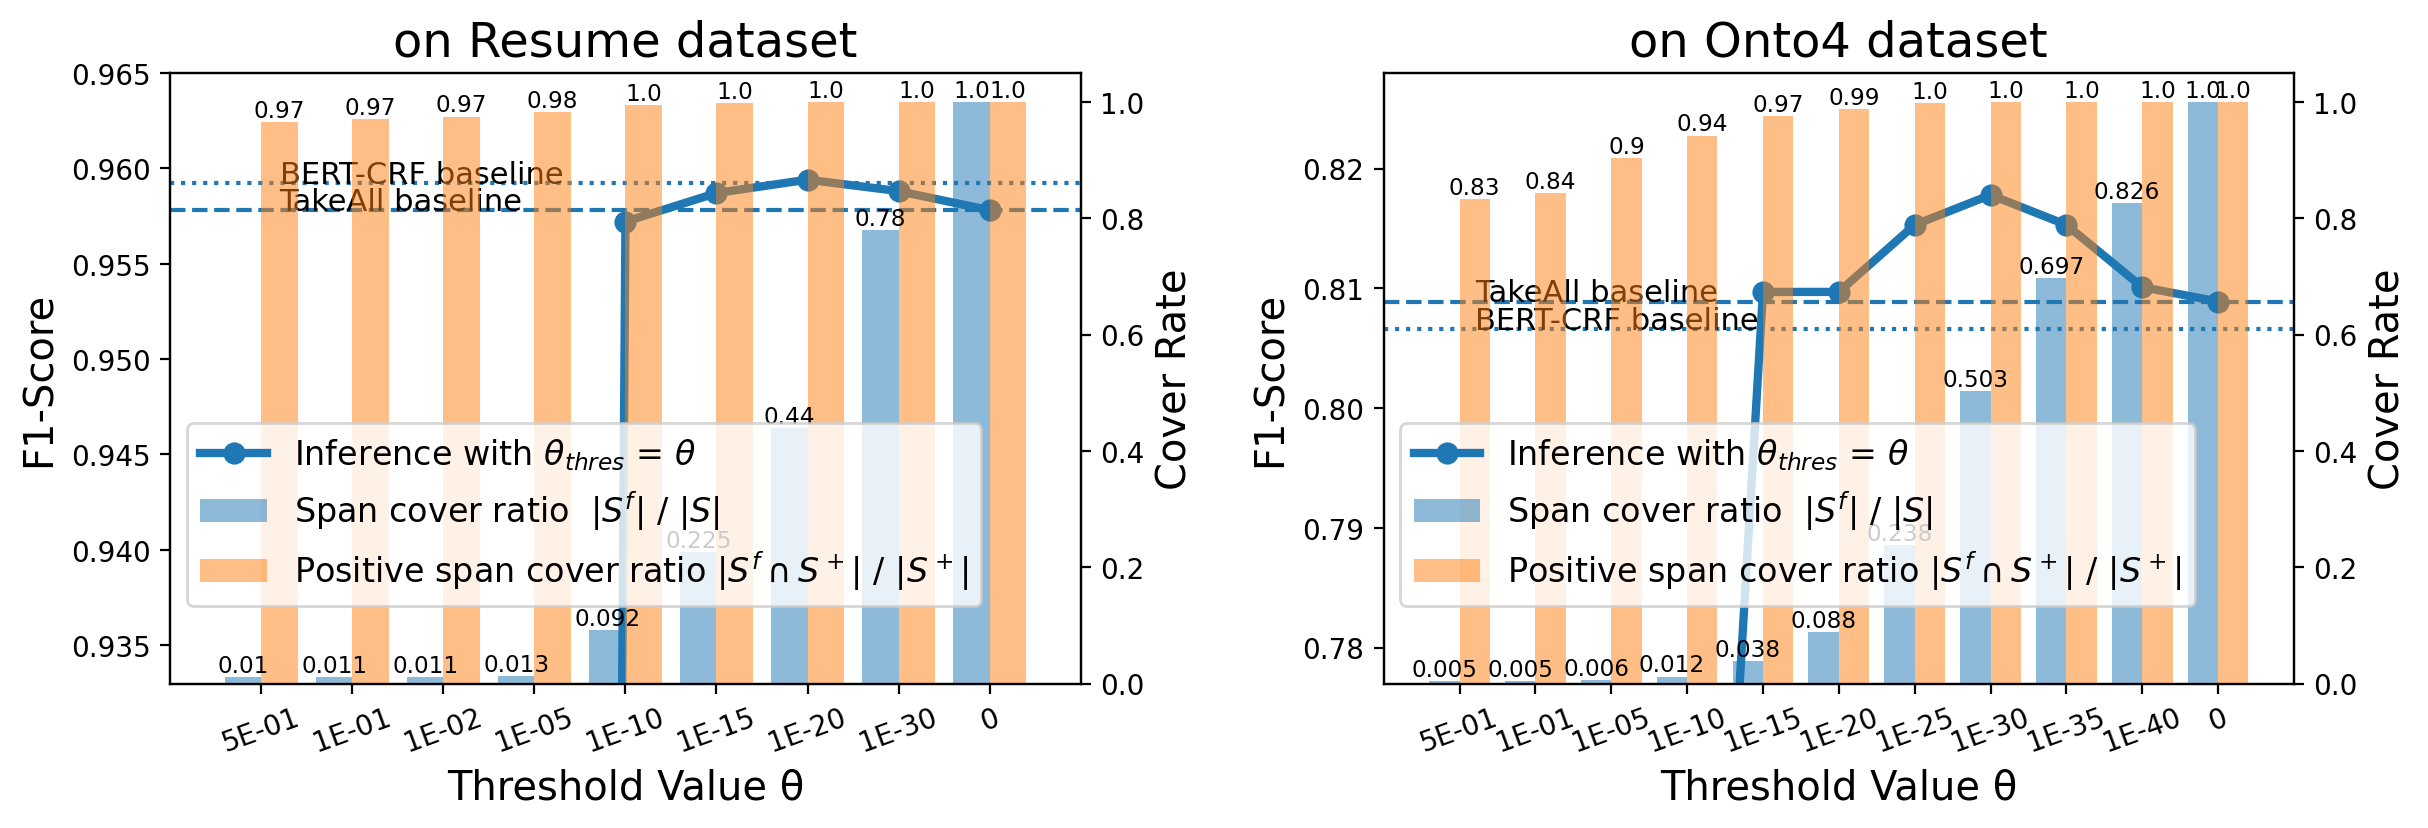

In [202]:
# resume onto4
plt.figure(figsize=(12, 4), dpi=200)
plt.figure(1)
add_blank_column = False
names = [r'Inference with $\theta_{thres}$ = $\theta$', 
         # r'Inference with $\theta_{thres}$ = 0', 
         r'Span cover ratio  $|S^f| ~/~ |S|$', 
         r'Positive span cover ratio $|S^f\cap S^+| ~/~ |S^+|$']


thres, n_pred, n_recall, f1_score, f1_score_all = resume_case
# ratio_case = [f1_score, f1_score_all]
ratio_case = [f1_score_all]
total_case = [n_pred, n_recall]
draw_with_cases(total_case=total_case, ratio_case=ratio_case, x_label=thres,
                # title='The Performance of Span-based Model with Different Threshold Values. (on RESUME dataset)',
                title='on Resume dataset',
                ylim_min=0.933, ylim_max=0.965,
                dataset_names=names, max_length=len(f1_score)-1, subplots=(1,2,1))

thres, n_pred, n_recall, f1_score, f1_score_all = onto4_case
# ratio_case = [f1_score, f1_score_all]
ratio_case = [f1_score_all]
total_case = [n_pred, n_recall]
draw_with_cases(total_case=total_case, ratio_case=ratio_case, x_label=thres,
                # title='The Performance of Span-based Model with Different Threshold Values. (on Onto4 dataset)',
                title='on Onto4 dataset',
                ylim_min=0.777, ylim_max=0.828,
                dataset_names=names, max_length=len(f1_score)-1, subplots=(1,2,2))


plt.tight_layout(pad=0.2, w_pad=2.0, h_pad=1.0)
plt.savefig(f'/home/chendian/PURE/figures/performance_of_thres_resume_and_onto4_220603.jpg', bbox_inches='tight')
plt.show()

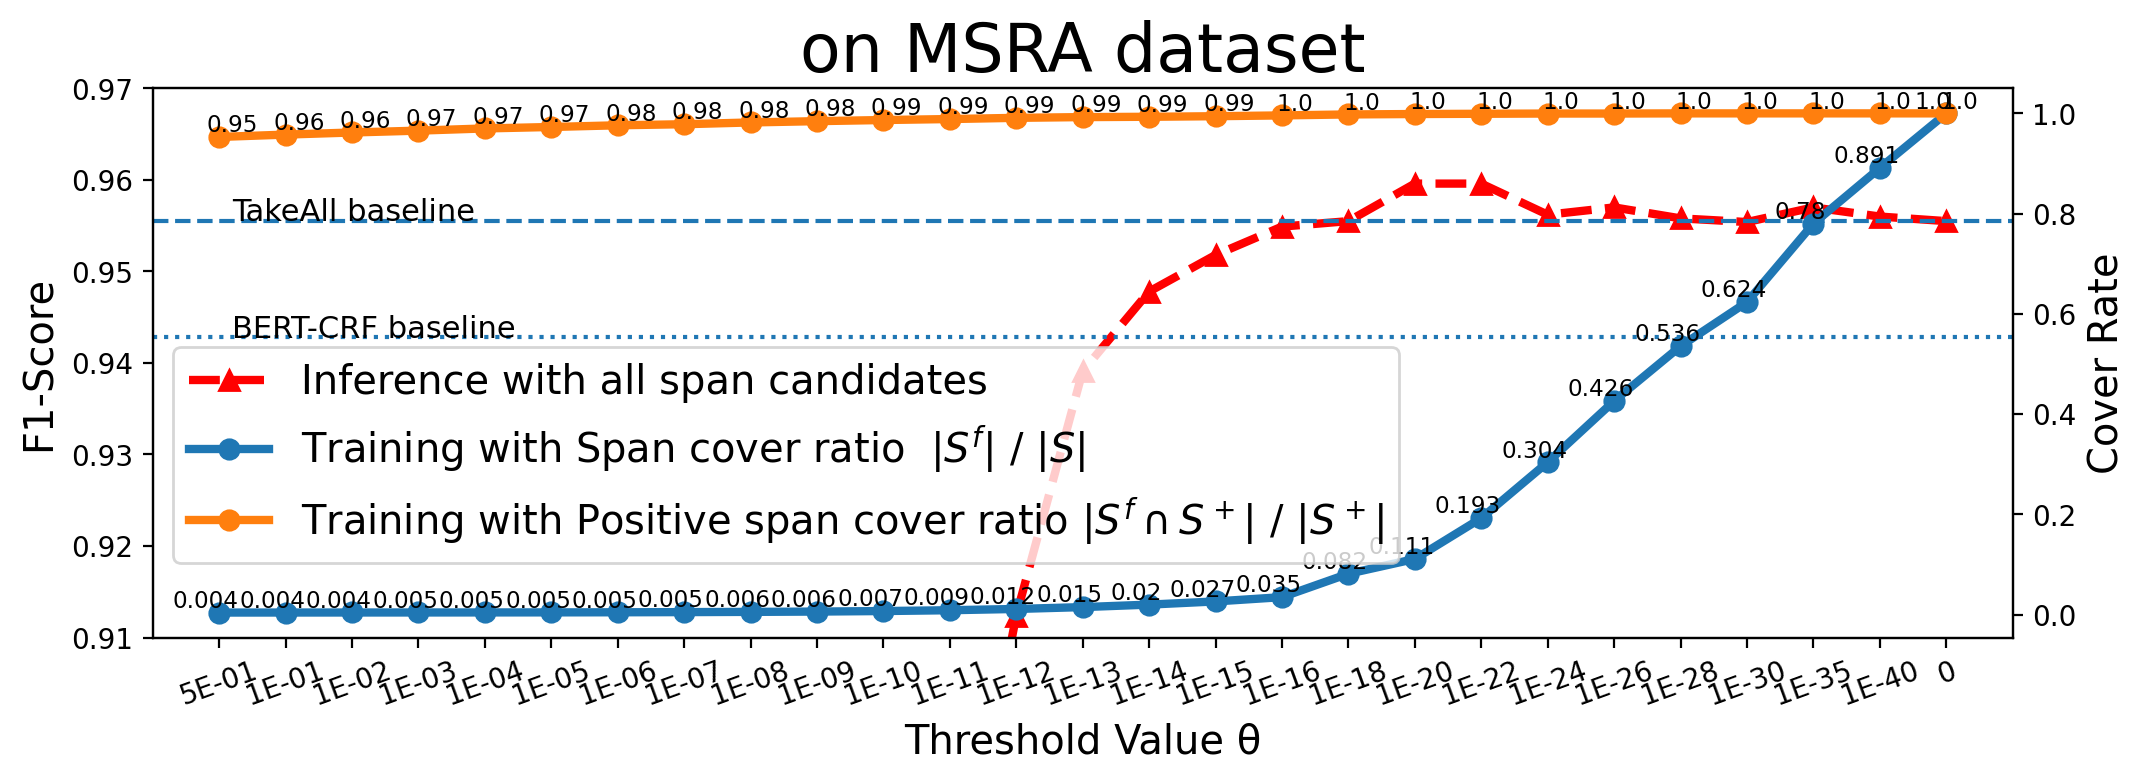

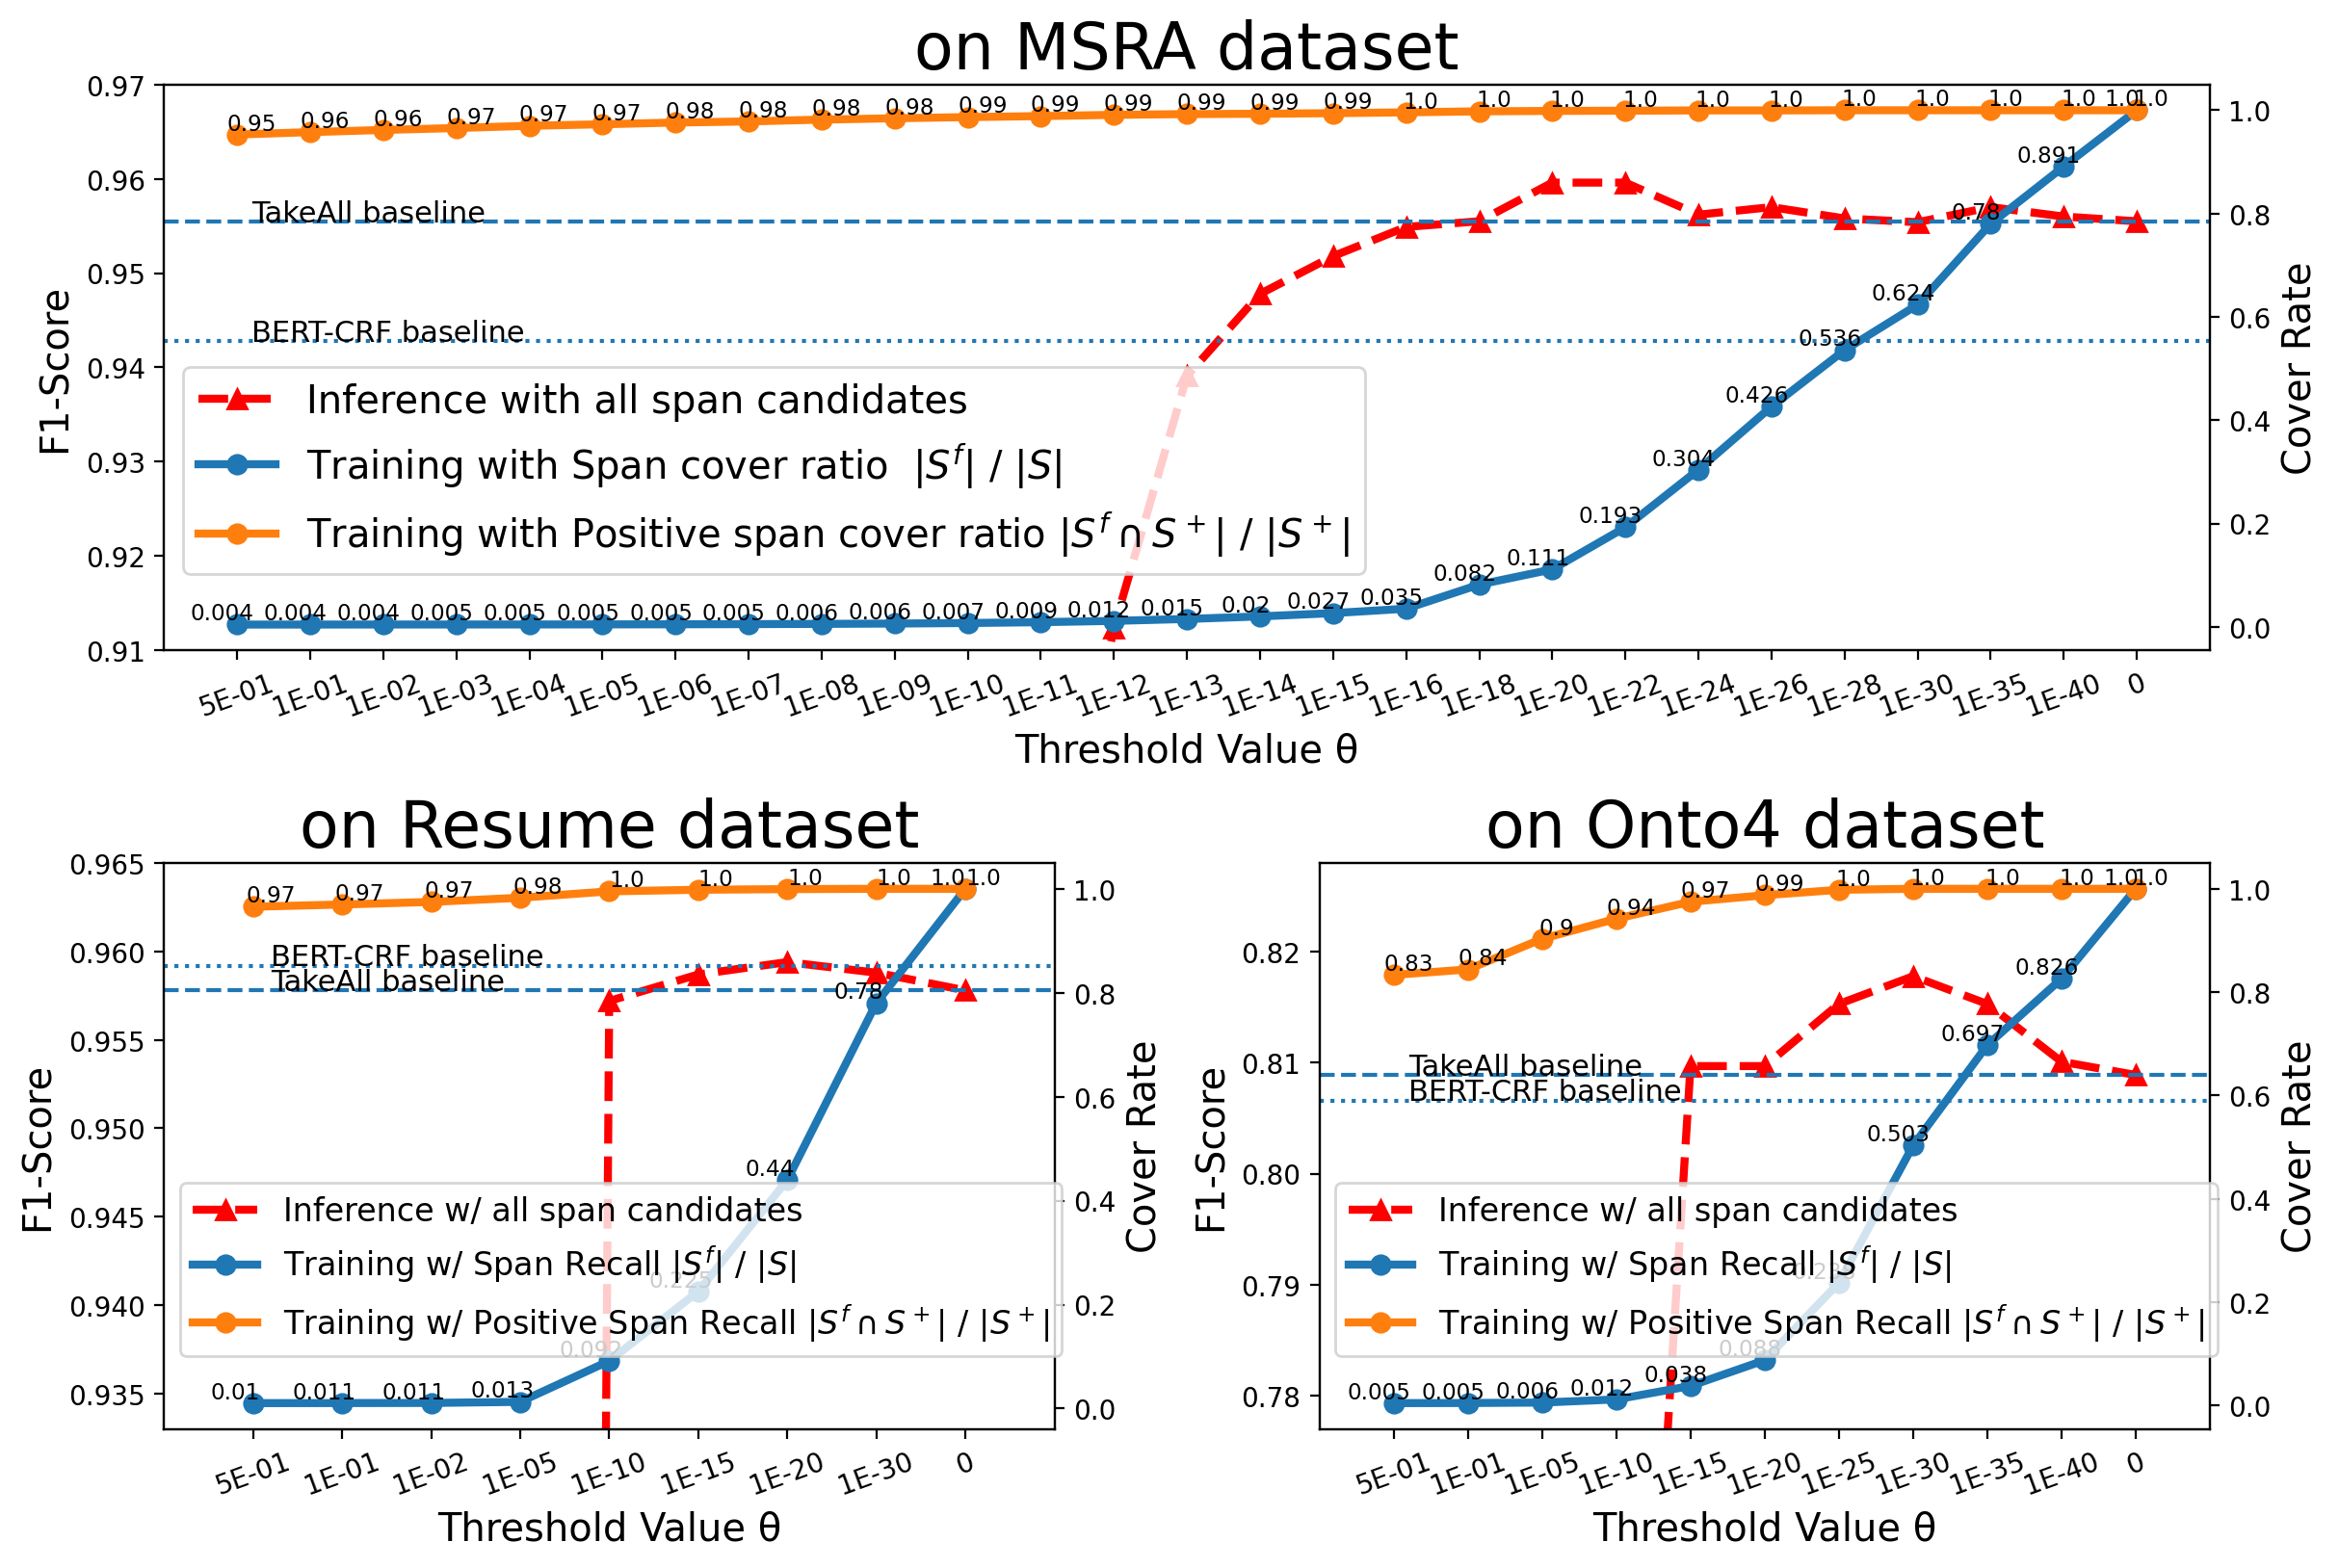

In [364]:
# MSRA
plt.figure(figsize=(12, 8), dpi=200)
plt.figure(1)
add_blank_column = False
names = [r'Inference with all span candidates', 
         r'Training with Span cover ratio  $|S^f| ~/~ |S|$', 
         r'Training with Positive span cover ratio $|S^f\cap S^+| ~/~ |S^+|$']


selected_indexes = list(range(len(msra_case[0])))
selected_indexes.remove(17)
selected_indexes.remove(19)
selected_indexes.remove(21)
selected_indexes.remove(23)
selected_indexes.remove(25)
selected_indexes.remove(27)
selected_indexes.remove(29)

if selected_indexes:
    thres = [item for idx, item in enumerate(msra_case[0]) if idx in selected_indexes]
    n_pred = [item for idx, item in enumerate(msra_case[1]) if idx in selected_indexes]
    n_recall = [item for idx, item in enumerate(msra_case[2]) if idx in selected_indexes]
    f1_score = [item for idx, item in enumerate(msra_case[3]) if idx in selected_indexes]
    f1_score_all = [item for idx, item in enumerate(msra_case[4]) if idx in selected_indexes]
else:
    thres, n_pred, n_recall, f1_score, f1_score_all = msra_case
# ratio_case = [f1_score, f1_score_all]
ratio_case = [f1_score_all]
total_case = [n_pred, n_recall]
draw_with_cases(total_case=total_case, ratio_case=ratio_case, x_label=thres,
                # title='The Performance of Span-based Model with Different Threshold Values. (on MSRA dataset)',
                title='on MSRA dataset',
                ylim_min=0.91, ylim_max=0.97,
                dataset_names=names, max_length=len(f1_score)-1, subplots=(2,1,1))


names = [r'Inference w/ all span candidates', 
         r'Training w/ Span Recall $|S^f| ~/~ |S|$', 
         r'Training w/ Positive Span Recall $|S^f\cap S^+| ~/~ |S^+|$']

# resume onto4
thres, n_pred, n_recall, f1_score, f1_score_all = resume_case
# ratio_case = [f1_score, f1_score_all]
ratio_case = [f1_score_all]
total_case = [n_pred, n_recall]
draw_with_cases(total_case=total_case, ratio_case=ratio_case, x_label=thres,
                # title='The Performance of Span-based Model with Different Threshold Values. (on RESUME dataset)',
                title='on Resume dataset',
                ylim_min=0.933, ylim_max=0.965,
                dataset_names=names, max_length=len(f1_score)-1, subplots=(2,2,3))

thres, n_pred, n_recall, f1_score, f1_score_all = onto4_case
# ratio_case = [f1_score, f1_score_all]
ratio_case = [f1_score_all]
total_case = [n_pred, n_recall]
draw_with_cases(total_case=total_case, ratio_case=ratio_case, x_label=thres,
                # title='The Performance of Span-based Model with Different Threshold Values. (on Onto4 dataset)',
                title='on Onto4 dataset',
                ylim_min=0.777, ylim_max=0.828,
                dataset_names=names, max_length=len(f1_score)-1, subplots=(2,2,4))


plt.tight_layout(pad=0.2, w_pad=1.0, h_pad=1.0)
plt.savefig(f'/home/chendian/PURE/figures/performance_of_thres_all_220609.jpg', bbox_inches='tight')
plt.show()

## threshold to cover ratio

In [509]:
def draw_with_cases(total_case, ratio_case, dataset_names, x_label=None, max_length=25, subplots=None, title=None, ylim_min=0.9, ylim_max=0.99):
    # 绘制图像
    if subplots:
        ax1 = plt.subplot(*subplots)
    else:
        fig, ax1 = plt.subplot()
        fig.set_size_inches(10, 6)
    plt.set_cmap('RdBu')
    dataset_kinds = len(total_case)
    gap_length = (2 * dataset_kinds + 1)
    x = np.arange(max_length + 1) * gap_length

    # ----------
    # 绘制柱状图
    # ----------
    ax1.set_xlim(-gap_length, max_length*gap_length+gap_length)
    w = 1
    
    bars = []
    positive_ratio = total_case[1]
    all_cover_ratio = total_case[0]
    
    _cv2, = ax1.plot(x, positive_ratio, linewidth=3, c='orange', marker='o', markersize=7, linestyle='-')
    bars.append(_cv2)
    _cv1, = ax1.plot(x, all_cover_ratio, linewidth=3, marker='o', markersize=7, linestyle='-')
    bars.append(_cv1)
    
    # 设置坐标轴的标签
    ax1.yaxis.set_tick_params(labelsize=10) # 设置y轴的字体的大小
    ax1.set_xticks(x) # 设置xticks出现的位置
    
    # 创建xticks
    if x_label:
        xticksName = ['0.5', '0.1'] + x_label[2:]
    else:
        xticksName = [f"{i}" for i in range(1, len(x))] + [' 26~']
    ax1.set_xticklabels(xticksName)
    ax1.set_xlabel(r"Threshold Value $\theta_{thres}$", fontsize='x-large')

    # ------
    # 设置 baseline 线
    # ------
    
    # 设置坐标轴名称
    ax1.set_ylabel("Cover Rate", fontsize='x-large')
    # 设置标题
    ax1.set_title(title if title else 'The Distribution of Span Counts', 
                  # fontsize='xx-large'
                  size=24
                 )
    
    for xtick in ax1.get_xticklabels():
        xtick.set_rotation(45)
    
    if not subplots:
        plt.show()
    
    return bars

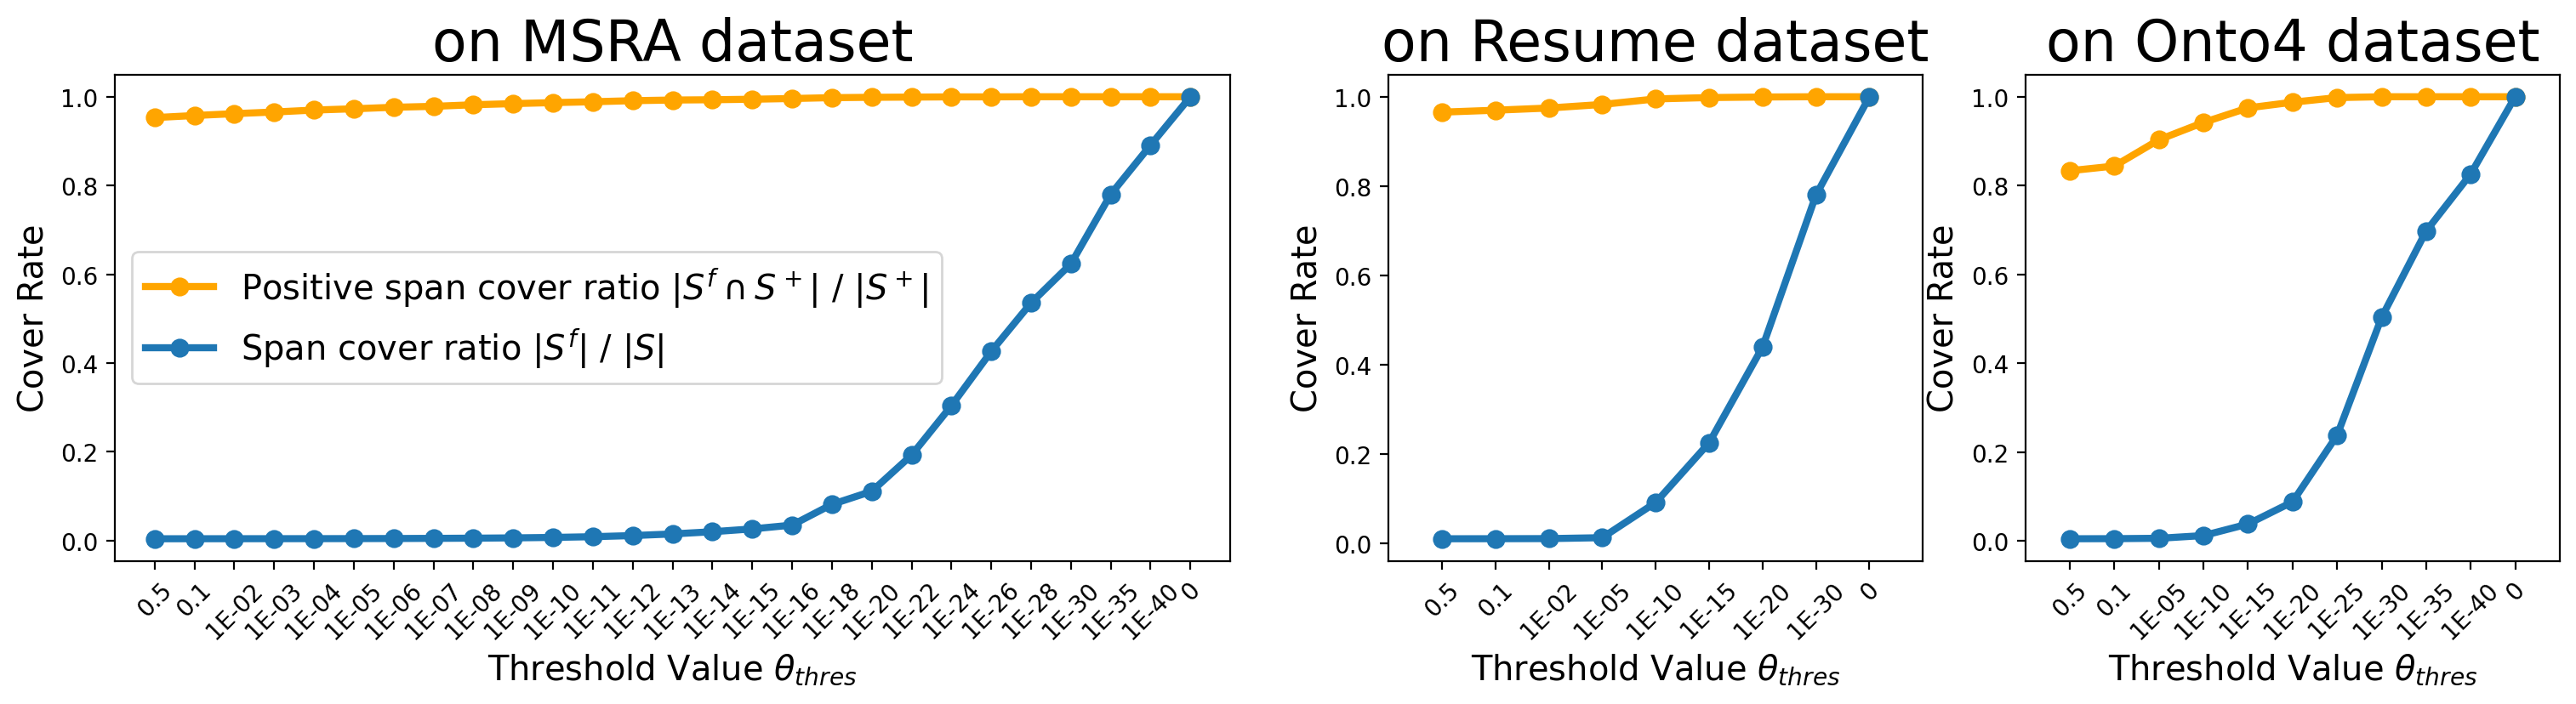

In [510]:
# MSRA
plt.figure(figsize=(15, 4), dpi=200)
plt.figure(1)
add_blank_column = False
names = [# r'Inference with all span candidates', ,
    r'Positive span cover ratio $|S^f\cap S^+| ~/~ |S^+|$',
    r'Span cover ratio $|S^f| ~/~ |S|$',
    ]


selected_indexes = list(range(len(msra_case[0])))
selected_indexes.remove(17)
selected_indexes.remove(19)
selected_indexes.remove(21)
selected_indexes.remove(23)
selected_indexes.remove(25)
selected_indexes.remove(27)
selected_indexes.remove(29)

if selected_indexes:
    thres = [item for idx, item in enumerate(msra_case[0]) if idx in selected_indexes]
    n_pred = [item for idx, item in enumerate(msra_case[1]) if idx in selected_indexes]
    n_recall = [item for idx, item in enumerate(msra_case[2]) if idx in selected_indexes]
    f1_score = [item for idx, item in enumerate(msra_case[3]) if idx in selected_indexes]
    f1_score_all = [item for idx, item in enumerate(msra_case[4]) if idx in selected_indexes]
else:
    thres, n_pred, n_recall, f1_score, f1_score_all = msra_case
# ratio_case = [f1_score, f1_score_all]
ratio_case = [f1_score_all]
total_case = [n_pred, n_recall]
bars = draw_with_cases(total_case=total_case, ratio_case=ratio_case, x_label=thres,
                # title='The Performance of Span-based Model with Different Threshold Values. (on MSRA dataset)',
                title='on MSRA dataset',
                ylim_min=0.91, ylim_max=0.97,
                dataset_names=names, max_length=len(f1_score)-1, subplots=(1,2,1))

plt.legend(handles=bars, 
           labels=names,  # [_dn.split('_')[0] for _dn in dataset_names], 
           fontsize = 'x-large', 
           loc='center left')

# resume onto4
thres, n_pred, n_recall, f1_score, f1_score_all = resume_case
# ratio_case = [f1_score, f1_score_all]
ratio_case = [f1_score_all]
total_case = [n_pred, n_recall]
bars = draw_with_cases(total_case=total_case, ratio_case=ratio_case, x_label=thres,
                # title='The Performance of Span-based Model with Different Threshold Values. (on RESUME dataset)',
                title='on Resume dataset',
                ylim_min=0.933, ylim_max=0.965,
                dataset_names=names, max_length=len(f1_score)-1, subplots=(1,4,3))

thres, n_pred, n_recall, f1_score, f1_score_all = onto4_case
# ratio_case = [f1_score, f1_score_all]
ratio_case = [f1_score_all]
total_case = [n_pred, n_recall]
draw_with_cases(total_case=total_case, ratio_case=ratio_case, x_label=thres,
                # title='The Performance of Span-based Model with Different Threshold Values. (on Onto4 dataset)',
                title='on Onto4 dataset',
                ylim_min=0.777, ylim_max=0.828,
                dataset_names=names, max_length=len(f1_score)-1, subplots=(1,4,4))

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=1.0)
plt.savefig(f'/home/chendian/PURE/figures/cover_of_thres_all_220610.jpg', bbox_inches='tight')
plt.show()

In [512]:
msra_scores = json.load(open('/home/chendian/PURE/data/msra_origin/train.with_span_score.json', 'r'))

In [521]:
positive_scores = []
from tqdm import tqdm
for scores, ner in tqdm(zip(msra_scores['scores'], msra_scores['ner'])):
    if len(ner) == 0:
        continue
    score_dict = {(l, r): s for l, r, s in scores}
    for l, r, t in ner:
        positive_scores.append(score_dict.get((l, r), -1.))

45033it [00:03, 13541.57it/s]


In [523]:
hit = 0
for s in positive_scores:
    if s > 0.999:
        hit += 1
hit, len(positive_scores), hit / len(positive_scores)

(74951, 75059, 0.9985611319095645)

In [435]:
def draw_with_cases(total_case, ratio_case, dataset_names, x_label=None, max_length=25, subplots=None, title=None, ylim_min=0.9, ylim_max=0.99):
    # 绘制图像
    if subplots:
        ax1 = plt.subplot(*subplots)
    else:
        fig, ax1 = plt.subplot()
        fig.set_size_inches(10, 6)
    plt.set_cmap('RdBu')
    x = np.arange(42)

    # ----------
    # 绘制折线图
    # ----------
    ax1.set_xlim(-1, 42)
    # ax1.set_ylim(0, np.stack(ratio_case).max() + 0.05)
    ax1.set_ylim(ylim_min, ylim_max)
    curves = []
    for ratio, _x_label in zip(ratio_case, x_label):
        _cv, = ax1.plot(
            [0] + [int(x.split('-')[-1]) for x in _x_label[1:-1]] + [41], 
            ratio, linewidth=3, marker='o', markersize=7, linestyle='-')
        curves.append(_cv)
    ax1.yaxis.set_tick_params(labelsize=10) # 设置y轴的字体的大小
    # ax1.axvline(16 * gap_length - dataset_kinds - 1, linestyle='--')
    ax1.set_xlabel(r"Threshold Value $\theta_{thres}$", fontsize='x-large')
    ax1.set_ylabel("F1-Score", fontsize='x-large')

    
    # 设置坐标轴的标签
    ax1.yaxis.set_tick_params(labelsize=10) # 设置y轴的字体的大小
    ax1.set_xticks(x) # 设置xticks出现的位置
    
    # 创建xticks
    xticksName = ['5E-01'] + [f"1E-{i}" for i in range(1, 41)] + ['0']
    ax1.set_xticklabels(xticksName)

    # ------
    # 设置 baseline 线
    # ------
    
    # 设置图例
    # 第一个数值用于控制legend的左右移动，值越大越向右边移动，第二个数值用于控制legend的上下移动，值越大，越向上移动。
    plt.legend(handles=curves, labels=dataset_names,
               fontsize = 'x-large', 
               bbox_to_anchor=(0.0, 0.1), 
               loc='lower left')
    
    for xtick in ax1.get_xticklabels():
        xtick.set_rotation(33)
    
    if not subplots:
        plt.show()


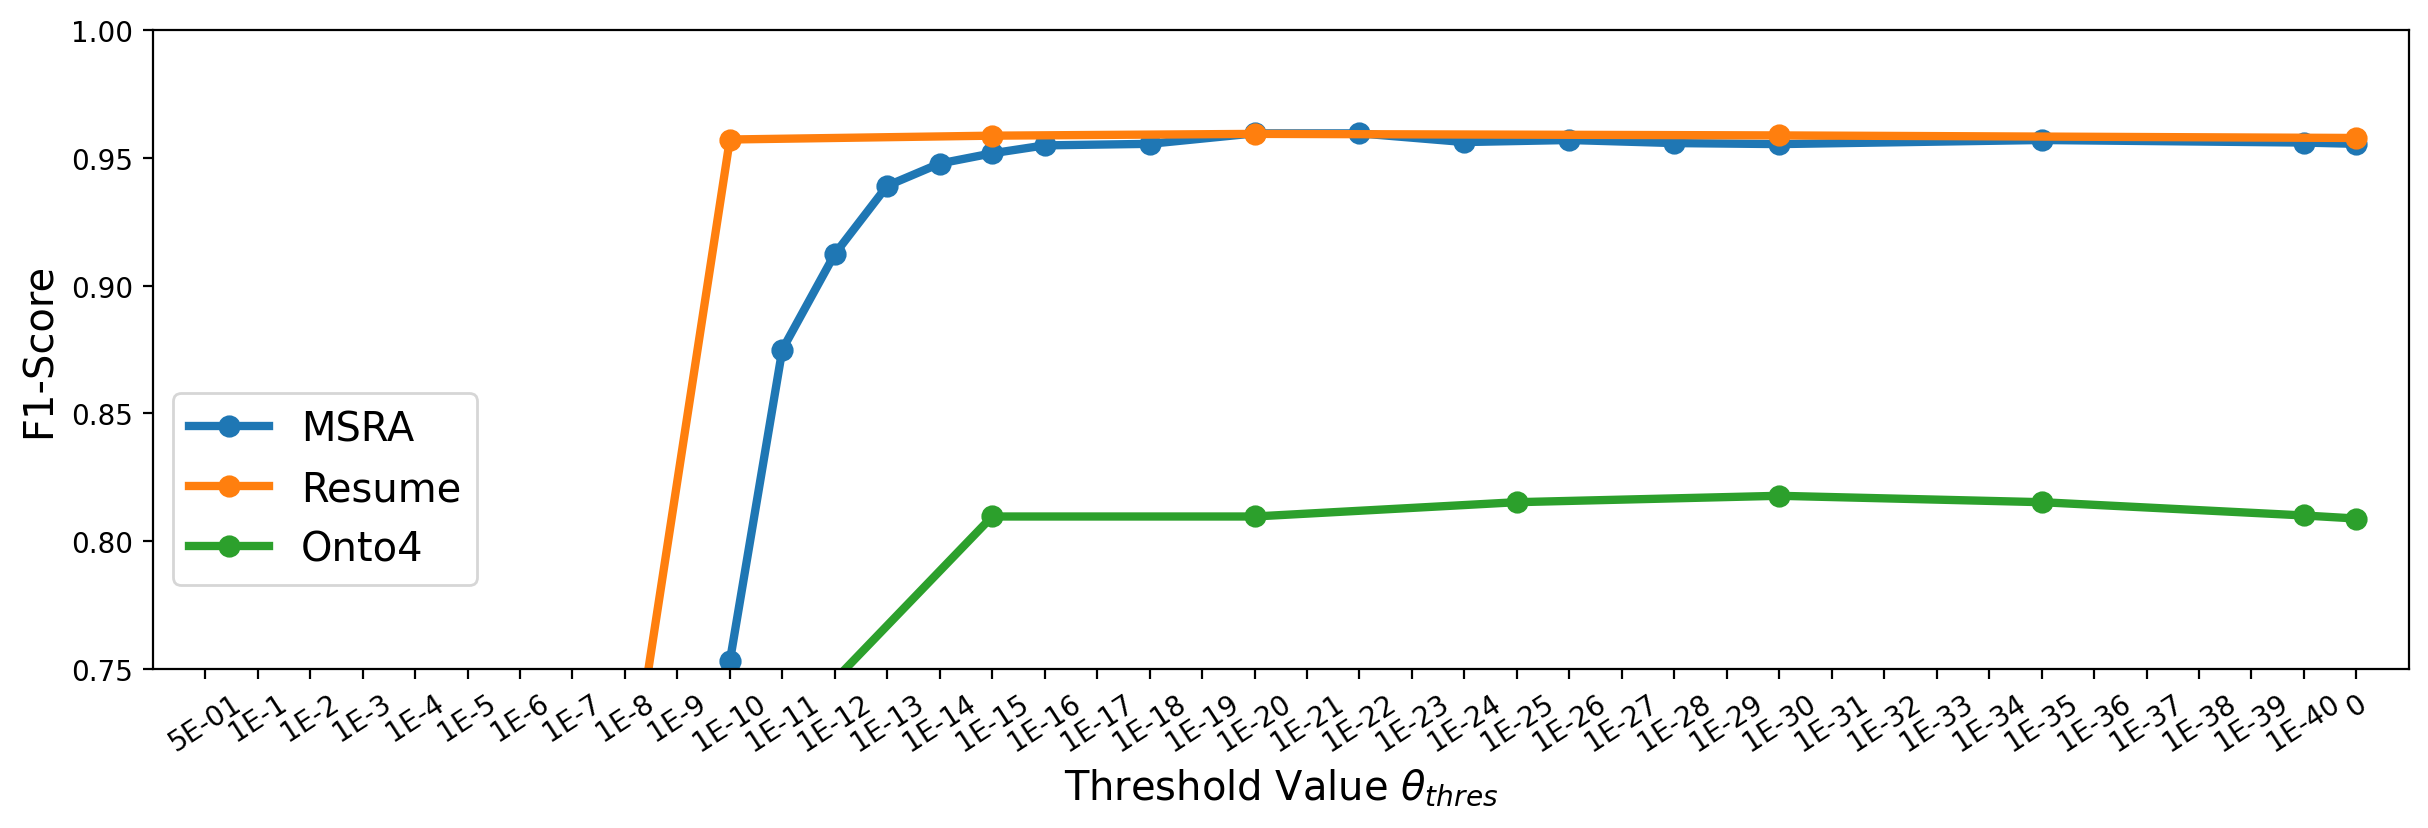

In [436]:
# MSRA
plt.figure(figsize=(12, 4), dpi=200)
plt.figure(1)
add_blank_column = False
names = [r'Inference with all span candidates', 
         # Inference with all span candidates
         # r'Positive span cover ratio $|S^f\cap S^+| ~/~ |S^+|$',
         # r'Span cover ratio $|S^f| ~/~ |S|$'
        ]


selected_indexes = list(range(len(msra_case[0])))
selected_indexes.remove(17)
selected_indexes.remove(19)
selected_indexes.remove(21)
selected_indexes.remove(23)
selected_indexes.remove(25)
selected_indexes.remove(27)
selected_indexes.remove(29)

if selected_indexes:
    thres = [item for idx, item in enumerate(msra_case[0]) if idx in selected_indexes]
    n_pred = [item for idx, item in enumerate(msra_case[1]) if idx in selected_indexes]
    n_recall = [item for idx, item in enumerate(msra_case[2]) if idx in selected_indexes]
    f1_score = [item for idx, item in enumerate(msra_case[3]) if idx in selected_indexes]
    f1_score_all = [item for idx, item in enumerate(msra_case[4]) if idx in selected_indexes]
else:
    thres, n_pred, n_recall, f1_score, f1_score_all = msra_case
         
# ratio_case = [f1_score, f1_score_all]
total_case = [n_pred, n_recall]

ratio_case = [f1_score_all]
ratio_case.append(resume_case[-1])
ratio_case.append(onto4_case[-1])

thres_case = [thres]
thres_case.append(resume_case[0])
thres_case.append(onto4_case[0])

draw_with_cases(total_case=total_case, ratio_case=ratio_case, x_label=thres_case,
                ylim_min=0.75, ylim_max=1.,
                dataset_names=['MSRA', 'Resume', 'Onto4'], subplots=(1,1,1))

plt.tight_layout(pad=0.2, w_pad=0.5, h_pad=1.0)
plt.savefig(f'/home/chendian/PURE/figures/performance_of_thres_all_220610.jpg', bbox_inches='tight')
plt.show()

In [541]:
def draw_with_cases(total_case, ratio_case, dataset_names, x_label=None, max_length=25, subplots=None, title=None, ylim_min=0.9, ylim_max=0.99):
    # 绘制图像
    if subplots:
        ax1 = plt.subplot(*subplots)
    else:
        fig, ax1 = plt.subplot()
        fig.set_size_inches(10, 6)
    plt.set_cmap('RdBu')
    dataset_kinds = len(total_case)
    gap_length = (2 * dataset_kinds + 1)
    x = np.arange(max_length + 1) * gap_length

    # ----------
    # 绘制折线图
    # ----------
    ax1.set_xlim(-gap_length, max_length*gap_length+gap_length)
    # ax1.set_ylim(0, np.stack(ratio_case).max() + 0.05)
    ax1.set_ylim(ylim_min, ylim_max)
    curves = []
    for ratio in ratio_case:
        _cv, = ax1.plot(x, ratio, linewidth=3, marker='o', markersize=7, linestyle='--')
        curves.append(_cv)
    ax1.yaxis.set_tick_params(labelsize=10) # 设置y轴的字体的大小
    # ax1.axvline(16 * gap_length - dataset_kinds - 1, linestyle='--')
    ax1.set_xlabel(r"Threshold Value $\theta_{FT}$", fontsize='xx-large')
    ax1.set_ylabel("F1-Score", fontsize='xx-large')
    
    # 设置坐标轴的标签
    ax1.yaxis.set_tick_params(labelsize=14) # 设置y轴的字体的大小
    ax1.set_xticks(x) # 设置xticks出现的位置
    
    # 创建xticks
    if x_label:
        xticksName = x_label
    else:
        xticksName = [f"{i}" for i in range(1, len(x))] + [' 26~']
    ax1.set_xticklabels(xticksName)

    # ------
    # 设置 baseline 线
    # ------
    ax1.set_ylim(ylim_min, ylim_max)
    
    ax1.axhline(ratio_case[0][-1], linestyle='--')
    ax1.annotate('TakeAll baseline', #文本内容
        xy=(1, ratio_case[0][-1]),#注释所在地
        xytext=(0, ratio_case[0][-1]), fontsize=12, #文本所在地
        # arrowprops=dict(arrowstyle="->"),
        # bbox=dict(boxstyle='round, pad=0.5', fc='yellow', ec='k', lw=1, alpha=0.5)
        # bbox=dict(boxstyle='round, pad=0.3', fc='white', ec='k', lw=0, alpha=0.7),
    )
    
    if 'msra' in title.lower():
        bc_value = 0.9428 # 0.9470
    elif 'resume' in title.lower():
        bc_value = 0.9592 # 0.9603
    elif 'onto4' in title.lower():
        bc_value = 0.8066 # 0.8149
    
    ax1.axhline(bc_value, linestyle=':')
    ax1.annotate('BERT-CRF baseline', #文本内容
        xy=(1, bc_value),  #注释所在地   
        xytext=(0, bc_value), fontsize=12, #文本所在地
        # arrowprops=dict(arrowstyle="->"),
        # bbox=dict(boxstyle='round, pad=0.3', fc='white', ec='k', lw=0, alpha=0.7)
    )
    
    # 设置图例
    plt.legend(handles=curves, labels=dataset_names,  # [_dn.split('_')[0] for _dn in dataset_names], 
               fontsize = 'x-large' if 'msra' in title.lower() else 'large', 
               # bbox_to_anchor=(0.0, 0.1), # 第一个数值用于控制legend的左右移动，值越大越向右边移动，第二个数值用于控制legend的上下移动，值越大，越向上移动。
               loc='lower right')
    
    for xtick in ax1.get_xticklabels():
        xtick.set_rotation(45)
    
    if not subplots:
        plt.show()


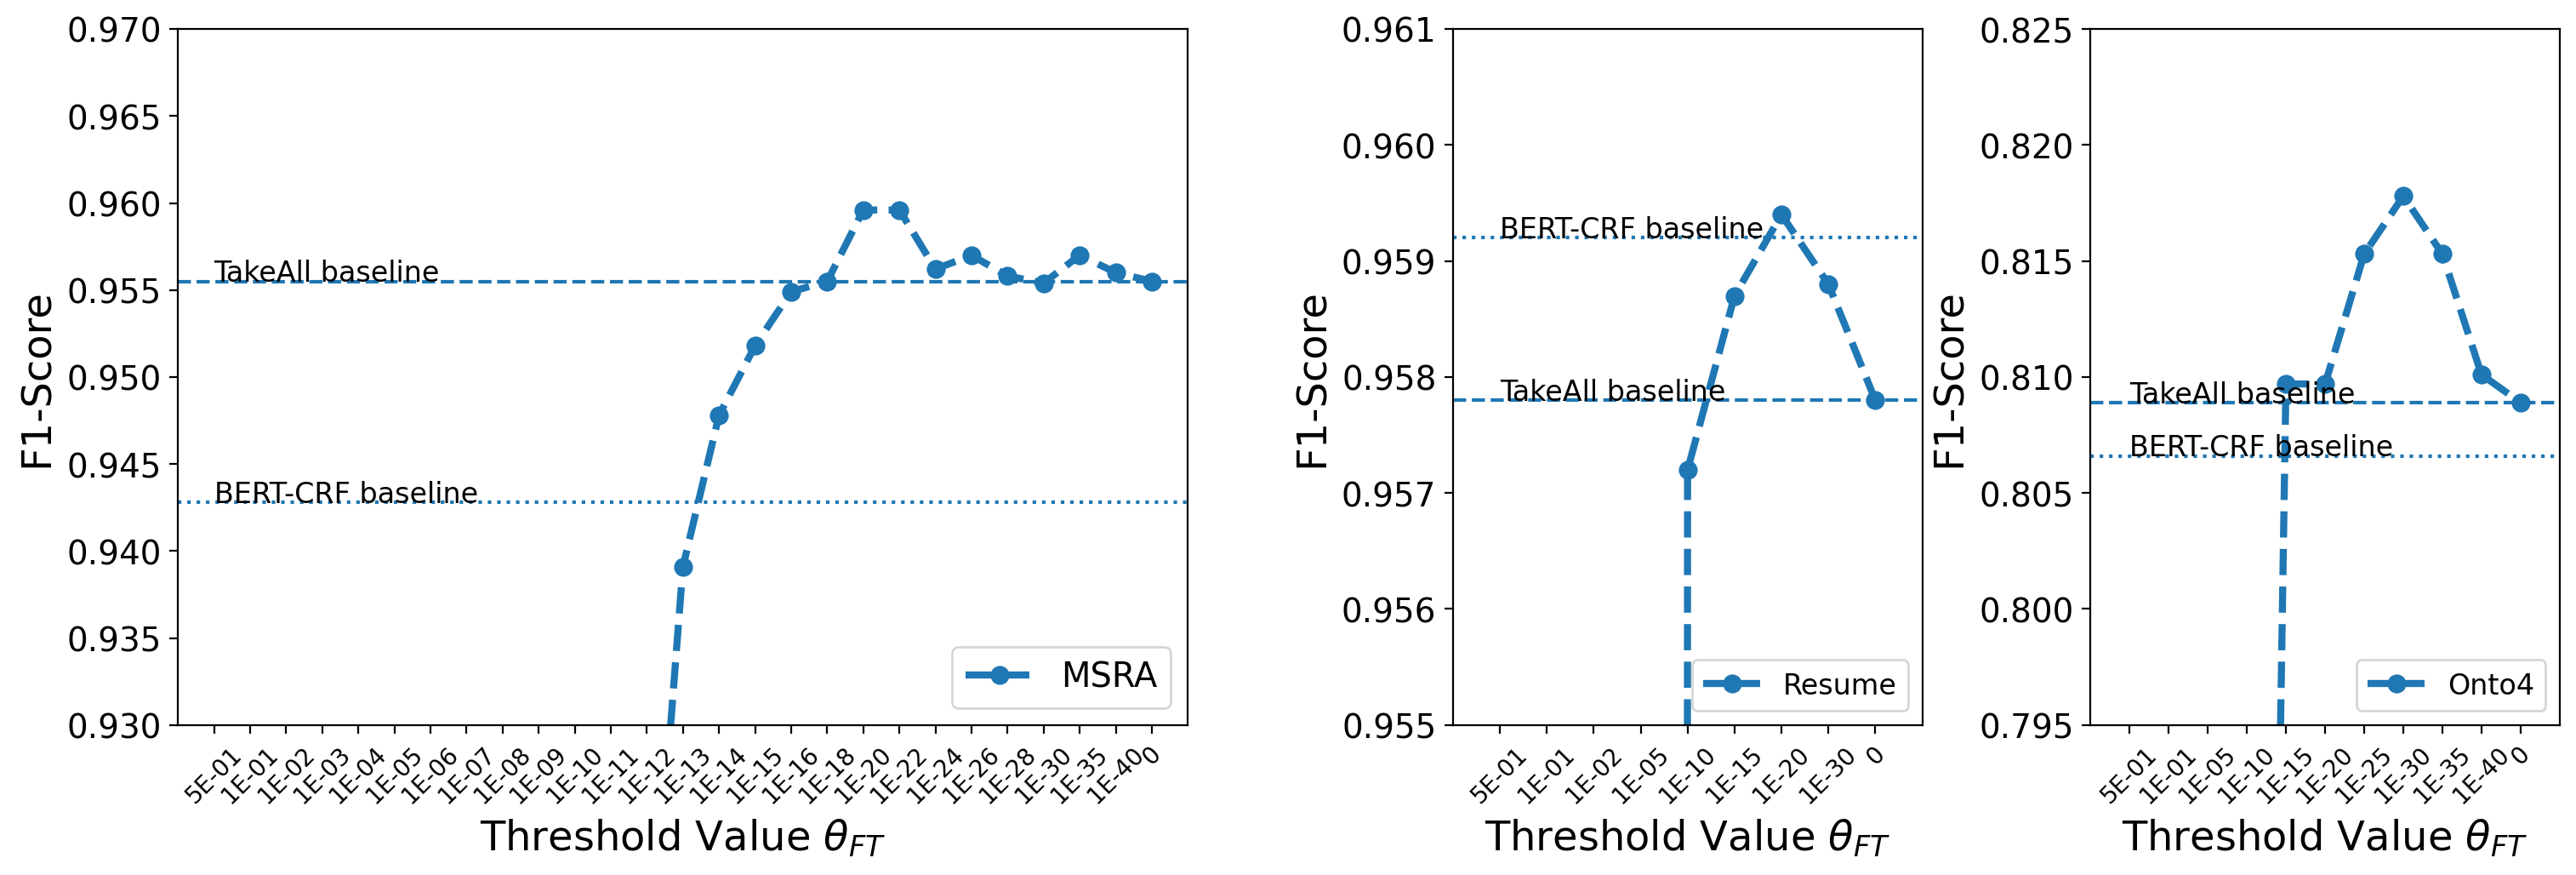

In [543]:
# MSRA
plt.figure(figsize=(15, 5), dpi=200)
plt.figure(1)
add_blank_column = False


selected_indexes = list(range(len(msra_case[0])))
selected_indexes.remove(17)
selected_indexes.remove(19)
selected_indexes.remove(21)
selected_indexes.remove(23)
selected_indexes.remove(25)
selected_indexes.remove(27)
selected_indexes.remove(29)

if selected_indexes:
    thres = [item for idx, item in enumerate(msra_case[0]) if idx in selected_indexes]
    n_pred = [item for idx, item in enumerate(msra_case[1]) if idx in selected_indexes]
    n_recall = [item for idx, item in enumerate(msra_case[2]) if idx in selected_indexes]
    f1_score = [item for idx, item in enumerate(msra_case[3]) if idx in selected_indexes]
    f1_score_all = [item for idx, item in enumerate(msra_case[4]) if idx in selected_indexes]
else:
    thres, n_pred, n_recall, f1_score, f1_score_all = msra_case
# ratio_case = [f1_score, f1_score_all]
ratio_case = [f1_score_all]
total_case = [n_pred, n_recall]
draw_with_cases(total_case=total_case, ratio_case=ratio_case, x_label=thres,
                # title='The Performance of Span-based Model with Different Threshold Values. (on MSRA dataset)',
                title='on MSRA dataset',
                ylim_min=0.93, ylim_max=0.97,
                dataset_names=['MSRA'], max_length=len(f1_score)-1, subplots=(1,2,1))

# resume onto4
thres, n_pred, n_recall, f1_score, f1_score_all = resume_case
# ratio_case = [f1_score, f1_score_all]
ratio_case = [f1_score_all]
total_case = [n_pred, n_recall]
draw_with_cases(total_case=total_case, ratio_case=ratio_case, x_label=thres,
                # title='The Performance of Span-based Model with Different Threshold Values. (on RESUME dataset)',
                title='on Resume dataset',
                ylim_min=0.955, ylim_max=0.961,
                dataset_names=['Resume'], max_length=len(f1_score)-1, subplots=(1,4,3))

thres, n_pred, n_recall, f1_score, f1_score_all = onto4_case
# ratio_case = [f1_score, f1_score_all]
ratio_case = [f1_score_all]
total_case = [n_pred, n_recall]
draw_with_cases(total_case=total_case, ratio_case=ratio_case, x_label=thres,
                # title='The Performance of Span-based Model with Different Threshold Values. (on Onto4 dataset)',
                title='on Onto4 dataset',
                ylim_min=0.795, ylim_max=0.825,
                dataset_names=['Onto4'], max_length=len(f1_score)-1, subplots=(1,4,4))


plt.tight_layout(pad=0.2, w_pad=0.3, h_pad=1.0)
plt.savefig(f'/home/chendian/PURE/figures/performance_of_thres_all_220612.jpg', bbox_inches='tight')
plt.show()